In [3]:
import pandas as pd

# # مسیر فایل‌ها
# files = [
#     "data.xlsx",
#     "data 1.xlsx",
#     "data 2.xlsx",
#     "data 3.xlsx"
# ]

# # خواندن همه فایل‌ها و چسباندن‌شان به هم
# dfs = [pd.read_excel(f) for f in files]
# combined_df = pd.concat(dfs, ignore_index=True)

# # نمایش تعداد کل ردیف‌ها
# print("Total rows:", len(combined_df))
# combined_df.rename(columns={
#     "شماره نمونه": "Sample ID",
#     "جنس": "Gender",
#     "سن": "Age",
#     "تشخیص": "Diagnosis",
#     "بخش بستری": "Ward"
# }, inplace=True)

# # نمایش چند ردیف اول
# print(combined_df.head())

# # (اختیاری) ذخیره فایل نهایی
# combined_df.to_excel("merged_output.xlsx", index=False)


In [4]:
df=pd.read_excel('merged_output.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample ID    714 non-null    object 
 1   Gender       714 non-null    object 
 2   Age          714 non-null    float64
 3   Diagnosis    697 non-null    object 
 4   Ward         607 non-null    object 
 5   RBC          714 non-null    float64
 6   HGB          714 non-null    float64
 7   HCT          714 non-null    float64
 8   MCV          714 non-null    float64
 9   MCH          714 non-null    float64
 10  MCHC         714 non-null    float64
 11  RDW-CV       714 non-null    float64
 12  RDW-SD       714 non-null    float64
 13  RET#         713 non-null    object 
 14  RET%         712 non-null    float64
 15  IRF          713 non-null    float64
 16  LFR          713 non-null    float64
 17  MFR          713 non-null    float64
 18  HFR          712 non-null    float64
 19  RHE     

In [5]:
# تعداد ردیف‌هایی که Sample ID تکراری دارند
duplicate_count = df.duplicated(subset="Sample ID").sum()

print(f"تعداد Sample ID تکراری: {duplicate_count}")

تعداد Sample ID تکراری: 256


In [6]:
duplicates = df[df.duplicated(subset="Sample ID", keep=False)]
duplicates_sorted = duplicates.sort_values(by="Sample ID")
duplicates_sorted.to_excel("duplicate_sample_ids.xlsx", index=False)


In [7]:
df=df.drop_duplicates(subset="Sample ID", keep="first")
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 718
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample ID    462 non-null    object 
 1   Gender       462 non-null    object 
 2   Age          462 non-null    float64
 3   Diagnosis    451 non-null    object 
 4   Ward         387 non-null    object 
 5   RBC          462 non-null    float64
 6   HGB          462 non-null    float64
 7   HCT          462 non-null    float64
 8   MCV          462 non-null    float64
 9   MCH          462 non-null    float64
 10  MCHC         462 non-null    float64
 11  RDW-CV       462 non-null    float64
 12  RDW-SD       462 non-null    float64
 13  RET#         462 non-null    object 
 14  RET%         462 non-null    float64
 15  IRF          462 non-null    float64
 16  LFR          462 non-null    float64
 17  MFR          462 non-null    float64
 18  HFR          462 non-null    float64
 19  RHE          

In [8]:
df = df.dropna(how='all')
df = df.reset_index(drop=True)


In [9]:
print(df["Gender"].unique())

['M' 'F' 'مرد' 'زن' 'زن ' 'مرد ' ' مرد']


In [10]:
# تعریف نگاشت مقدار به عدد
gender_map = {
    "f": 1, "زن": 1, "زن ": 1,
    "m": 0, "مرد": 0, "مرد ": 0, " مرد": 0
}

# پاک‌سازی و نگاشت
df["Gender"] = df["Gender"].astype(str).str.strip().str.lower().map(gender_map)


In [11]:
print(df["Gender"].unique())
df = df.drop(columns=["Age"])


[0 1]


In [12]:
df.head()

,Sample ID,Gender,Diagnosis,Ward,RBC,HGB,HCT,MCV,MCH,MCHC,...,PCT,P-LCC,P-LCR,IPF,RBC Message,WBC message,PLT message,Iron,TIBC,Ferritin
0,L030317181,0,تنگی نفس,داخلی جنرال یک,3.36,8.9,27.3,75.2,24.5,32.6,...,0.286,71.0,223.6,3.9,Anemia,NaN,NaN,NaN,NaN,NaN
1,L030317088,1,آنمی,NaN,2.86,6.5,20.4,71.4,22.7,31.9,...,0.198,55.0,25.3,7.9,Fragments?/Dimorphic Population/RBC Histogram ...,Immature Gran?/NRBC present/Lymphopenia,PLT Histogram Abn.,NaN,NaN,NaN
2,L030314270,0,کراتین بالا,جراحی عمومی,2.99,8.2,25.7,86.0,27.3,31.9,...,0.268,84.0,35.2,4.0,Anemia,NaN,NaN,NaN,NaN,NaN
3,L0303107278,1,درد شکم,جراحی عمومی,3.52,8.6,24.0,76.8,24.4,31.9,...,0.475,111.0,21.5,2.3,Anemia/Anisocytosis,Abn Lymph/Blast?/Neutrophilia,NaN,NaN,NaN,NaN
4,L030315369,1,گوارشی,داخلی گوارش,4.55,7.3,24.9,54.8,16.0,29.3,...,0.038,11.0,27.4,19.6,Fragments?/Anisocytosis/Iron Deficiency?/Mycro...,Lymphopenia,PLT Histogram Abn/Thrombocytopenia,NaN,NaN,20.4


In [13]:
df['Diagnosis'].unique()

array(['تنگی نفس', 'آنمی', 'کراتین بالا', 'درد شکم', 'گوارشی', 'شکم درد',
       'ضعف و بی حالی', 'قلبی', 'سیکل سل', 'تزریق خون', nan,
       'درد قفسه سینه', 'عفونت ادراری', 'سردرد', 'هموگلوبین پایین', 'ادم',
       'ایکتر', 'استفراغ خونی', 'اسهال', 'درد قلبی ', 'ادم شکم',
       'تالاسمی (کم)', 'کلیوی', 'تصادفی', 'آب مروارید', 'درد اپیگاستر',
       'تب و لرز', 'عدم تحمل غذا', 'بی حسی اندام', 'ضعف و بیحالی',
       'کاهش سطح', 'تزریق دارو', 'درد سینه', ' کلیوی', 'زخم دیابتی',
       'ضربه به سر', 'خونریزی گوارشی', 'عقرب گزیدگی', 'قند بالا',
       'بدن درد', 'پیلونفریت', 'پنومونی', 'خونریزی مقعد', 'عفونت پا',
       'قند خون بالا', 'گزش نامشخص', 'اختلالات روانی', 'افت پلاکت',
       'انمی', 'کاهش سطح ', 'اختلال در ازمایش', 'تروما دست', 'هيدروسفالى',
       'اینتوبه', 'مسمومیت داروئی', 'فیشر انوس', 'سکته مغزی', 'کم خونی',
       'پارگی پا', 'مدفوع خونی', 'پرش اندام', 'خونریزی', 'کاهش پلاکت خون',
       'سیکل تال', 'حساسیت دارویی', 'سرفه های مکرر', 'خونریزی از مقعد',
       'درد پهلو',

In [14]:
import numpy as np

def classify_diagnosis(text):
    if pd.isnull(text):
        return "Other"
    
    t = str(text).strip().replace("‌", "").replace("  ", " ").lower()
    
    if any(word in t for word in ["آنمی", "انمی", "کم خونی", "هموگلوبین پایین", "فاویسم", "سیکل سل", "تزریق خون", "افت پلاکت", "کاهش پلاکت"]):
        return "Anemia"
    elif any(word in t for word in ["کلیوی", "کلیه", "ادراری", "دیالیز", "نارسایی", "احتباس", "پیلونفریت"]):
        return "Renal"
    elif any(word in t for word in ["قلبی", "قلب", "فشار خون", "آنژیوگرافی", "امبولی"]):
        return "Cardiac"
    elif any(word in t for word in ["گوارشی", "اسهال", "استفراغ", "تهوع", "مدفوع", "شکم درد", "دل درد", "خونریزی گوارشی", "صفرا"]):
        return "GI"
    elif any(word in t for word in ["سردرد", "تشنج", "سکته", "صرع", "هوشیاری", "مغزی"]):
        return "Neuro"
    elif any(word in t for word in ["عفونت", "سلولیت", "عقرب", "مار", "تب", "لرز"]):
        return "Infection"
    elif any(word in t for word in ["سرطان", "توده", "کانسر", "روماتیسم", "تورم", "بستر", "رماتیسم"]):
        return "Chronic"
    elif any(word in t for word in ["تروما", "ضربه", "سقوط", "تصادف"]):
        return "Trauma"
    else:
        return "Other"

# اعمال دسته‌بندی
df["Diagnosis_Group"] = df["Diagnosis"].apply(classify_diagnosis)
df.head()

,Sample ID,Gender,Diagnosis,Ward,RBC,HGB,HCT,MCV,MCH,MCHC,...,P-LCC,P-LCR,IPF,RBC Message,WBC message,PLT message,Iron,TIBC,Ferritin,Diagnosis_Group
0,L030317181,0,تنگی نفس,داخلی جنرال یک,3.36,8.9,27.3,75.2,24.5,32.6,...,71.0,223.6,3.9,Anemia,NaN,NaN,NaN,NaN,NaN,Other
1,L030317088,1,آنمی,NaN,2.86,6.5,20.4,71.4,22.7,31.9,...,55.0,25.3,7.9,Fragments?/Dimorphic Population/RBC Histogram ...,Immature Gran?/NRBC present/Lymphopenia,PLT Histogram Abn.,NaN,NaN,NaN,Anemia
2,L030314270,0,کراتین بالا,جراحی عمومی,2.99,8.2,25.7,86.0,27.3,31.9,...,84.0,35.2,4.0,Anemia,NaN,NaN,NaN,NaN,NaN,Other
3,L0303107278,1,درد شکم,جراحی عمومی,3.52,8.6,24.0,76.8,24.4,31.9,...,111.0,21.5,2.3,Anemia/Anisocytosis,Abn Lymph/Blast?/Neutrophilia,NaN,NaN,NaN,NaN,Other
4,L030315369,1,گوارشی,داخلی گوارش,4.55,7.3,24.9,54.8,16.0,29.3,...,11.0,27.4,19.6,Fragments?/Anisocytosis/Iron Deficiency?/Mycro...,Lymphopenia,PLT Histogram Abn/Thrombocytopenia,NaN,NaN,20.4,GI


In [15]:
df = df.drop(columns=["Diagnosis"])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Diagnosis_Group"] = le.fit_transform(df["Diagnosis_Group"])


In [16]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label → Code mapping:")
print(label_map)

Label → Code mapping:
{'Anemia': np.int64(0), 'Cardiac': np.int64(1), 'Chronic': np.int64(2), 'GI': np.int64(3), 'Infection': np.int64(4), 'Neuro': np.int64(5), 'Other': np.int64(6), 'Renal': np.int64(7), 'Trauma': np.int64(8)}


In [17]:
df["Diagnosis_Group"].unique()

array([6, 0, 3, 1, 7, 5, 8, 4, 2])

In [18]:
cols = ["RBC", "HGB", "HCT", "MCV", "MCH", "MCHC", "RDW-CV", "RDW-SD", "RET#", "RET%", "IRF", "LFR", "MFR", "HFR", "RHE"]

summary = []

for col in cols:
    series = pd.to_numeric(df[col], errors='coerce')  # تبدیل به عدد برای اطمینان
    na_count = series.isna().sum()
    zero_count = (series == 0).sum()
    min_val = series.min()
    max_val = series.max()
    mean_val = series.mean()
    std_val = series.std()
    
    # تعریف داده پرت با روش z-score
    z_scores = ((series - mean_val) / std_val).abs()
    outliers = (z_scores > 3).sum()

    summary.append({
        "Feature": col,
        "Missing": na_count,
        "Zero": zero_count,
        "Min": round(min_val, 2),
        "Max": round(max_val, 2),
        "Mean": round(mean_val, 2),
        "Std": round(std_val, 2),
        "Outliers (>3σ)": outliers
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

   Feature  Missing  Zero    Min      Max   Mean     Std  Outliers (>3σ)
0      RBC        0     0   0.23    10.90   3.79    0.97               2
1      HGB        0     0   0.90    76.00   9.54    3.90               2
2      HCT        0     0   2.50   162.00  30.14    9.16               3
3      MCV        0     0  23.50   118.60  80.16   10.71               5
4      MCH        0     0  11.30   352.20  26.55   20.13               2
5     MCHC        0     0  16.30   324.00  31.93   13.70               1
6   RDW-CV        0     0  11.10   113.50  17.79    6.96               5
7   RDW-SD        0     0   0.03   111.00  50.91   13.82              14
8     RET#        1     1   0.00     3.04   0.10    0.21               3
9     RET%        0     1   0.00    79.00   2.73    4.99               6
10     IRF        0     2   0.00    81.20  20.33   12.18               5
11     LFR        0     1   0.00  7725.00  95.56  355.98               1
12     MFR        0     2   0.00    29.20  13.49   

In [19]:
# بررسی مقادیر خیلی غیرعادی در MCH (بالاتر از 100)
outlier_mch = df[df["MCH"] > 100]
print("🔍 مقدارهای مشکوک در MCH:")
print(outlier_mch[["MCH"]])

# اگر مطمئنی که باید 35.2 باشه، اصلاح کن:
df.loc[df["MCH"] > 100, "MCH"] = 35.2

# بررسی مجدد برای اطمینان
print("\n✅ مقدارهای اصلاح‌شده:")
print(df[df["MCH"] == 35.2][["MCH"]])


🔍 مقدارهای مشکوک در MCH:
       MCH
289  292.8
327  352.2

✅ مقدارهای اصلاح‌شده:
      MCH
289  35.2
327  35.2


In [20]:
# محاسبه میانگین MCHC بدون مقدارهای غیرعادی
valid_mean = df[df["MCHC"] <= 100]["MCHC"].mean()

# نمایش مقدار میانگین معتبر
print(f"✅ میانگین معتبر MCHC: {round(valid_mean, 2)}")

# جایگزینی مقدارهای بزرگ‌تر از 100 (مثل 324) با میانگین معتبر
df.loc[df["MCHC"] > 100, "MCHC"] = valid_mean

# بررسی نتیجه
print("\n🔁 مقدارهای جایگزین‌شده:")
print(df[df["MCHC"] == valid_mean][["MCHC"]])


✅ میانگین معتبر MCHC: 31.3

🔁 مقدارهای جایگزین‌شده:
          MCHC
327  31.296095


In [21]:
# محاسبه چارک‌ها
Q1 = df["RDW-SD"].quantile(0.25)
Q3 = df["RDW-SD"].quantile(0.75)
IQR = Q3 - Q1

# حد پایین و بالا
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# بررسی داده‌های پرت
outliers = df[(df["RDW-SD"] < lower_bound) | (df["RDW-SD"] > upper_bound)]
print("🔍 داده‌های پرت RDW-SD بر اساس IQR:")
print(outliers[["RDW-SD"]])

# اصلاح: جایگزینی با میانگین معتبر
valid_mean = df[(df["RDW-SD"] >= lower_bound) & (df["RDW-SD"] <= upper_bound)]["RDW-SD"].mean()
df.loc[(df["RDW-SD"] < lower_bound) | (df["RDW-SD"] > upper_bound), "RDW-SD"] = valid_mean


🔍 داده‌های پرت RDW-SD بر اساس IQR:
       RDW-SD
1     99.3000
9     97.2000
27    91.7000
31    93.8000
41   100.0000
52   109.8000
91    95.5000
101   92.9000
106   83.4000
113   77.1000
115   83.6000
123   84.1000
132  100.0000
148   78.7000
153   80.3000
177   99.1000
194   85.8000
242    0.0312
268   97.8000
276   84.7000
293  100.0000
302   83.3000
319   88.5000
325    0.0980
335   79.8000
341  111.0000
407   92.1000
454   91.2000


In [22]:
df["RET#"] = pd.to_numeric(df["RET#"], errors="coerce")
valid_mean = df["RET#"].mean()
df["RET#"].fillna(valid_mean, inplace=True)

/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/564663357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RET#"].fillna(valid_mean, inplace=True)


In [23]:
# تبدیل به عددی و پاکسازی اولیه
df["RET%"] = pd.to_numeric(df["RET%"], errors="coerce")

# مقدار میانگین معتبر فقط برای داده‌های بین 0.5 تا 6
valid_mean = df[(df["RET%"] >= 0.5) & (df["RET%"] <= 6)]["RET%"].mean()

# جایگزینی مقدارهای بسیار بالا (غیرواقعی) با میانگین معتبر
df.loc[df["RET%"] > 10, "RET%"] = valid_mean

# مقدار صفر رو فقط نگه می‌داریم، حذف یا جایگزینی نمی‌کنیم
# مقدار NaN رو با میانگین معتبر پر می‌کنیم
df["RET%"].fillna(valid_mean, inplace=True)

# بررسی نهایی
print("📊 مقدارهای مشکوک RET% اصلاح شد.")
print(df["RET%"].describe())


📊 مقدارهای مشکوک RET% اصلاح شد.
count    462.000000
mean       1.946948
std        1.576238
min        0.000000
25%        0.970000
50%        1.610000
75%        2.350000
max        9.880000
Name: RET%, dtype: float64


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2365887402.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RET%"].fillna(valid_mean, inplace=True)


In [24]:
# اطمینان از عددی بودن
df["LFR"] = pd.to_numeric(df["LFR"], errors="coerce")

# تشخیص مقدار پرت شدید (مثلاً بزرگ‌تر از 1000 واحد)
outlier_threshold = 1000
outliers = df[df["LFR"] > outlier_threshold]

print("📍 موارد مشکوک در LFR (بیش از 1000):")
print(outliers[["LFR", "HGB", "Diagnosis_Group"]])

# میانگین معتبر فقط در بازه نرمال
valid_mean = df[df["LFR"] < outlier_threshold]["LFR"].mean()

# جایگزینی مقدار پرت با میانگین معتبر
df.loc[df["LFR"] > outlier_threshold, "LFR"] = valid_mean

# جایگزینی NaN (اختیاری)
df["LFR"].fillna(valid_mean, inplace=True)


📍 موارد مشکوک در LFR (بیش از 1000):
        LFR  HGB  Diagnosis_Group
432  7725.0  9.4                5


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2519951249.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LFR"].fillna(valid_mean, inplace=True)


In [25]:
# تبدیل به عددی (در صورت لزوم)
df["MFR"] = pd.to_numeric(df["MFR"], errors="coerce")

# محاسبه میانگین معتبر (مقدارهای بزرگ‌تر از صفر)
valid_mean = df[df["MFR"] > 0]["MFR"].mean()

# نمایش ردیف‌هایی با مقدار صفر
print("📍 ردیف‌هایی با MFR = 0:")
print(df[df["MFR"] == 0][["MFR", "RET%", "Diagnosis_Group"]])

# جایگزینی مقدار صفر با میانگین معتبر
df.loc[df["MFR"] == 0, "MFR"] = valid_mean


📍 ردیف‌هایی با MFR = 0:
     MFR  RET%  Diagnosis_Group
92   0.0  0.00                8
250  0.0  0.43                6


In [26]:
median_anemia = df[(df["Diagnosis_Group"] == "Anemia") & (df["HFR"] > 0)]["HFR"].median()
df.loc[(df["Diagnosis_Group"] == "Anemia") & (df["HFR"] == 0), "HFR"] = median_anemia


In [27]:
# مطمئن شو که عددیه
df["RHE"] = pd.to_numeric(df["RHE"], errors="coerce")

# محاسبه میانه معتبر از داده‌های غیر صفر
valid_median = df[df["RHE"] > 0]["RHE"].median()

# جایگزینی صفر با میانه
df.loc[df["RHE"] == 0, "RHE"] = valid_median

# همچنین می‌تونی NaNها رو هم پر کنی
df["RHE"].fillna(valid_median, inplace=True)


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/716107572.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RHE"].fillna(valid_median, inplace=True)


In [28]:
df["NRBC#"] = pd.to_numeric(df["NRBC#"], errors='coerce')
df["NRBC%"] = pd.to_numeric(df["NRBC%"], errors='coerce')

# ساخت خلاصه آماری
nrbc_summary = df[["NRBC#", "NRBC%"]].describe().transpose()

# افزودن تعداد مقدارهای گمشده
nrbc_summary["missing"] = df[["NRBC#", "NRBC%"]].isna().sum()

# افزودن تعداد مقدار صفر
nrbc_summary["zero_count"] = (df[["NRBC#", "NRBC%"]] == 0).sum()

# نمایش خلاصه
print("\n📊 خلاصه آماری NRBC:")
print(nrbc_summary)




📊 خلاصه آماری NRBC:
       count      mean        std  min  25%  50%    75%      max  missing  \
NRBC#  462.0  0.745824   4.679618  0.0  0.0  0.0  0.035   68.153        0   
NRBC%  462.0  4.984253  26.101137  0.0  0.0  0.0  0.365  310.210        0   

       zero_count  
NRBC#         322  
NRBC%         321  


In [29]:
from sklearn.preprocessing import RobustScaler

# تعریف آستانه‌ها
nrbc_percent_threshold = 10
nrbc_abs_threshold = 20

# مقدارهای پرت رو NaN کن (برای ایمپیوت بعدی)
df.loc[df["NRBC%"] > nrbc_percent_threshold, "NRBC%"] = np.nan
df.loc[df["NRBC#"] > nrbc_abs_threshold, "NRBC#"] = np.nan

# ایمپیوت با میانه
df["NRBC%"].fillna(df["NRBC%"].median(), inplace=True)
df["NRBC#"].fillna(df["NRBC#"].median(), inplace=True)

# مقیاس‌گذاری مقاوم به اوت‌لایر
scaler = RobustScaler()
df[["NRBC%", "NRBC#"]] = scaler.fit_transform(df[["NRBC%", "NRBC#"]])

/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2286519867.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NRBC%"].fillna(df["NRBC%"].median(), inplace=True)
/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2286519867.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [30]:
import pandas as pd

# لیست ستون‌های شمارش و درصد سلول‌های سفید
wbc_cols = [
    "WBC", "Neu#", "Lym#", "Mon#", "Eos#", "Bas#", "IMG#",
    "Neo%", "Lym%", "Mon%", "Eos%", "Bas%", "IMG%"
]

# تبدیل تمام ستون‌ها به عددی (در صورت نیاز)
for col in wbc_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# محاسبه آمار کلی
wbc_summary = df[wbc_cols].describe().transpose()

# افزودن تعداد صفر و NaN
wbc_summary["missing"] = df[wbc_cols].isna().sum()
wbc_summary["zero_count"] = (df[wbc_cols] == 0).sum()

# نمایش خروجی نهایی
print("📊 خلاصه آماری ستون‌های WBC و زیرگروه‌ها:")
print(wbc_summary)


📊 خلاصه آماری ستون‌های WBC و زیرگروه‌ها:
      count       mean        std  min      25%    50%     75%     max  \
WBC   462.0  10.502749  20.869438  0.0   5.1325   7.10  10.740  372.00   
Neu#  457.0   5.438031   6.047081  0.0   2.0500   4.04   6.630   58.26   
Lym#  455.0   1.747802   1.760715  0.0   0.7400   1.37   2.240   19.10   
Mon#  455.0   0.523143   0.563464  0.0   0.2300   0.43   0.685    6.63   
Eos#  457.0   0.184354   0.266636  0.0   0.0200   0.09   0.240    2.31   
Bas#  456.0   0.032851   0.166063  0.0   0.0000   0.02   0.030    3.36   
IMG#  457.0   0.266193   3.818216  0.0   0.0000   0.01   0.050   81.50   
Neo%  457.0  56.301926  26.718379  0.0  44.0000  60.90  76.500   96.20   
Lym%  453.0  23.293598  17.954646  0.0   8.5000  21.80  35.700   97.30   
Mon%  455.0   6.174549   4.255585  0.0   3.8000   6.10   8.700   41.80   
Eos%  457.0   2.585033   3.430236  0.0   0.2000   1.60   3.400   23.10   
Bas%  457.0   0.342101   0.651697  0.0   0.1000   0.20   0.400   12.00 

In [31]:

# بررسی مقادیر WBC بزرگ‌تر از 100 (مشکوک به outlier)
suspicious_wbc = df[df["WBC"] > 100]

# نمایش ردیف‌های مشکوک با اطلاعات کمکی مثل Diagnosis و Diagnosis_Group
cols_to_show = ["WBC", "HGB", "Diagnosis_Group"]
print("📌 ردیف‌هایی با WBC مشکوک (بیش از 100):")
display(suspicious_wbc[cols_to_show])


📌 ردیف‌هایی با WBC مشکوک (بیش از 100):


,WBC,HGB,Diagnosis_Group
74,372.00,8.9,4
354,208.16,6.8,0


In [32]:
df["WBC_outlier"] = df["WBC"] > 100
# جایگزینی با صدک 99ام از مقادیر منطقی
upper_limit = df.loc[df["WBC"] < 100, "WBC"].quantile(0.99)
df.loc[df["WBC"] > 100, "WBC"] = upper_limit


In [33]:
# پیدا کردن ردیف‌هایی که Neu# صفر دارن
neu_zero_df = df[df["Neu#"] == 0][["WBC", "Neu#", "Diagnosis_Group"]]

# تعداد کل این ردیف‌ها
print(f"🔢 تعداد موارد Neu# = 0: {len(neu_zero_df)}")

# نمایش توزیع گروه‌های تشخیص برای Neu# = 0
print("\n📊 توزیع Diagnosis_Group برای Neu# = 0:")
print(neu_zero_df["Diagnosis_Group"].value_counts())

# بررسی آماری WBC در این ردیف‌ها
print("\n📈 خلاصه آماری WBC در مواردی که Neu# = 0:")
print(neu_zero_df["WBC"].describe())


🔢 تعداد موارد Neu# = 0: 48

📊 توزیع Diagnosis_Group برای Neu# = 0:
Diagnosis_Group
6    24
0    11
3     6
5     2
7     2
8     2
2     1
Name: count, dtype: int64

📈 خلاصه آماری WBC در مواردی که Neu# = 0:
count    48.000000
mean     11.531115
std      12.603624
min       0.000000
25%       4.380000
50%       7.570000
75%      14.662500
max      73.630000
Name: WBC, dtype: float64


In [34]:
import numpy as np

# حذف ردیف‌هایی که Neu# = 0 و WBC > 10 → احتمال زیاد داده خراب
df = df[~((df["Neu#"] == 0) & (df["WBC"] > 10))]

# جایگزینی صفرهای باقی‌مانده در Neu# با NaN (برای WBC ≤ 10)
df.loc[(df["Neu#"] == 0) & (df["WBC"] <= 10), "Neu#"] = np.nan

# محاسبه median معتبر فقط از مقادیر غیر صفر و غیر NaN
valid_neu_median = df["Neu#"][(df["Neu#"].notna()) & (df["Neu#"] > 0)].median()

# جایگزینی NaN با میانه معتبر
df["Neu#"].fillna(valid_neu_median, inplace=True)

print(f"✅ مقادیر مشکوک Neu# پاک‌سازی و NaN با میانه معتبر ({valid_neu_median:.2f}) جایگزین شد.")


✅ مقادیر مشکوک Neu# پاک‌سازی و NaN با میانه معتبر (4.62) جایگزین شد.


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/1674888347.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Neu#"].fillna(valid_neu_median, inplace=True)


In [35]:
# استخراج ردیف‌هایی که مقدار Lym# برابر صفر هست
lym_zero_df = df[df["Lym#"] == 0][["WBC", "Lym#", "Diagnosis_Group"]]

print(f"🔢 تعداد موارد Lym# = 0: {len(lym_zero_df)}")
print("\n📊 توزیع Diagnosis_Group برای Lym# = 0:")
print(lym_zero_df["Diagnosis_Group"].value_counts())
print("\n📈 خلاصه آماری WBC در مواردی که Lym# = 0:")
print(lym_zero_df["WBC"].describe())


🔢 تعداد موارد Lym# = 0: 35

📊 توزیع Diagnosis_Group برای Lym# = 0:
Diagnosis_Group
6    18
0     6
3     6
5     2
4     1
2     1
8     1
Name: count, dtype: int64

📈 خلاصه آماری WBC در مواردی که Lym# = 0:
count    35.000000
mean      6.399143
std       5.587632
min       0.000000
25%       3.505000
50%       5.790000
75%       7.725000
max      32.280000
Name: WBC, dtype: float64


In [36]:
# فقط تبدیل موارد مشکوک به NaN (بدون حذف)
df.loc[(df["Lym#"] == 0) & (df["WBC"] > 2), "Lym#"] = np.nan

# محاسبه میانه معتبر (بدون صفر و NaN)
valid_lym_median = df["Lym#"][(df["Lym#"].notna()) & (df["Lym#"] > 0)].median()

# جایگزینی NaN با میانه
df["Lym#"].fillna(valid_lym_median, inplace=True)

print(f"✅ مقادیر مشکوک Lym# با میانه ({valid_lym_median:.2f}) جایگزین شدند.")


✅ مقادیر مشکوک Lym# با میانه (1.53) جایگزین شدند.


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2163930376.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Lym#"].fillna(valid_lym_median, inplace=True)


In [37]:
# مرحله 1: تبدیل موارد مشکوک Neo% = 0 به NaN فقط اگر WBC > 2
df.loc[(df["Neo%"] == 0) & (df["WBC"] > 2), "Neo%"] = np.nan

# مرحله 2: محاسبه میانه معتبر Neo% (بدون صفر و NaN)
valid_neo_median = df["Neo%"][(df["Neo%"].notna()) & (df["Neo%"] > 0)].median()

# مرحله 3: جایگزینی مقادیر NaN با میانه معتبر
df["Neo%"].fillna(valid_neo_median, inplace=True)

print(f"✅ مقادیر مشکوک Neo% با میانه {valid_neo_median:.2f}% جایگزین شدند.")


✅ مقادیر مشکوک Neo% با میانه 64.30% جایگزین شدند.


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/3928018762.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Neo%"].fillna(valid_neo_median, inplace=True)


In [38]:
import numpy as np

# 1️⃣ Lym% = 0 + Neo% < 40 + WBC > 2 → مشکوک
df.loc[(df["Lym%"] == 0) & (df["Neo%"] < 40) & (df["WBC"] > 2), "Lym%"] = np.nan

# میانگین معتبر برای Lym%
valid_lym_median = df["Lym%"][(df["Lym%"].notna()) & (df["Lym%"] > 0)].median()

# جایگزینی با میانه
df["Lym%"].fillna(valid_lym_median, inplace=True)

print(f"✅ Lym% مشکوک با میانه {valid_lym_median:.2f}% جایگزین شد.")

# 2️⃣ IMG% > 50 → حذف یا جایگزینی
df.loc[df["IMG%"] > 50, "IMG%"] = np.nan

# محاسبه میانه معتبر
valid_img_median = df["IMG%"][(df["IMG%"].notna()) & (df["IMG%"] <= 50)].median()

# جایگزینی مقادیر مشکوک
df["IMG%"].fillna(valid_img_median, inplace=True)

print(f"✅ IMG% > 50 حذف و با میانه {valid_img_median:.2f}% جایگزین شد.")


✅ Lym% مشکوک با میانه 24.50% جایگزین شد.
✅ IMG% > 50 حذف و با میانه 0.20% جایگزین شد.


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2748049895.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Lym%"].fillna(valid_lym_median, inplace=True)
/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2748049895.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 461
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample ID        444 non-null    object 
 1   Gender           444 non-null    int64  
 2   Ward             375 non-null    object 
 3   RBC              444 non-null    float64
 4   HGB              444 non-null    float64
 5   HCT              444 non-null    float64
 6   MCV              444 non-null    float64
 7   MCH              444 non-null    float64
 8   MCHC             444 non-null    float64
 9   RDW-CV           444 non-null    float64
 10  RDW-SD           444 non-null    float64
 11  RET#             444 non-null    float64
 12  RET%             444 non-null    float64
 13  IRF              444 non-null    float64
 14  LFR              444 non-null    float64
 15  MFR              444 non-null    float64
 16  HFR              444 non-null    float64
 17  RHE              444 

In [40]:
import pandas as pd
import numpy as np

# اگر دیتافریم شما قبلاً ساخته شده (مثلاً df = pd.read_csv(...))

# لیست ستون‌های پلاکت
platelet_cols = ["PLT", "MPV", "PDW", "PCT", "P-LCC", "P-LCR", "IPF"]

# تبدیل همه ستون‌ها به عددی (در صورت وجود مشکل از نوع object)
for col in platelet_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# محاسبه خلاصه آماری
platelet_summary = df[platelet_cols].describe().transpose()

# افزودن تعداد NaN و صفرها
platelet_summary["missing"] = df[platelet_cols].isna().sum()
platelet_summary["zero_count"] = (df[platelet_cols] == 0).sum()

# نمایش نتیجه
print("📊 خلاصه آماری ویژگی‌های پلاکتی:")
print(platelet_summary)


📊 خلاصه آماری ویژگی‌های پلاکتی:
       count        mean         std      min      25%       50%      75%  \
PLT    444.0  226.066892  143.426776   2.0000  134.500  201.5000  290.250   
MPV    444.0   10.951374    1.597495   7.4000    9.800   10.8000   11.900   
PDW    444.0   15.972973    0.846498   3.6000   15.600   16.0000   16.400   
PCT    444.0    0.241945    0.144287   0.0006    0.152    0.2295    0.301   
P-LCC  444.0   71.246622   42.355044   1.0000   45.000   66.0000   90.000   
P-LCR  444.0   34.799099   14.424872  11.1000   25.900   33.1500   41.425   
IPF    444.0    7.993919    8.055924   0.0000    3.400    5.7000    8.875   

           max  missing  zero_count  
PLT    947.000        0           0  
MPV     16.500        0           0  
PDW     18.000        0           0  
PCT      1.022        0           0  
P-LCC  278.000        0           0  
P-LCR  223.600        0           0  
IPF     72.000        0           1  


In [41]:
# اصلاح مقادیر غیرواقعی
df.loc[df["P-LCR"] > 100, "P-LCR"] = np.nan
df.loc[df["IPF"] > 30, "IPF"] = np.nan

# محاسبه میانه برای جایگزینی
df["P-LCR"].fillna(df["P-LCR"].median(), inplace=True)
df["IPF"].fillna(df["IPF"].median(), inplace=True)

# پرچم‌گذاری outlierهای پزشکی برای کمک به مدل
df["PLT_high"] = df["PLT"] > 600
df["MPV_high"] = df["MPV"] > 14
df["IPF_high"] = df["IPF"] > 15  # تولید شدید پلاکت


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/3912271394.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["P-LCR"].fillna(df["P-LCR"].median(), inplace=True)
/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/3912271394.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [42]:
import pandas as pd

# فرض بر اینه که df قبلاً ساخته شده

# بررسی آمار مربوط به Iron, TIBC, Ferritin
iron_cols = ["Iron", "TIBC", "Ferritin"]
for col in iron_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

iron_summary = df[iron_cols].describe().transpose()
iron_summary["missing"] = df[iron_cols].isna().sum()
iron_summary["zero_count"] = (df[iron_cols] == 0).sum()

print("📊 خلاصه آماری Iron / TIBC / Ferritin:")
print(iron_summary)

# نمایش مقادیر یونیک پیام‌ها
print("\n🧾 مقادیر یونیک RBC Message:")
print(df["RBC Message"].dropna().unique())

print("\n🧾 مقادیر یونیک WBC message:")
print(df["WBC message"].dropna().unique())

print("\n🧾 مقادیر یونیک PLT message:")
print(df["PLT message"].dropna().unique())


📊 خلاصه آماری Iron / TIBC / Ferritin:
          count        mean          std    min     25%     50%     75%  \
Iron      213.0   62.924883    42.193668  14.00   33.00   50.00   83.00   
TIBC      207.0  315.505700   256.699723  81.99  259.50  289.00  324.00   
Ferritin  187.0  833.705722  3303.368461   1.06   59.69  172.48  515.85   

              max  missing  zero_count  
Iron        294.0      231           0  
TIBC       3321.0      237           0  
Ferritin  40000.0      257           0  

🧾 مقادیر یونیک RBC Message:
['Anemia'
 'Fragments?/Dimorphic Population/RBC Histogram Abn./Anisocytosis/Anemia'
 'Anemia/Anisocytosis'
 'Fragments?/Anisocytosis/Iron Deficiency?/Mycrocytosis/Anemia'
 'Iron Deficiency?/Mycrocytosis/Anemia'
 'Fragments?/Anisocytosis/Anemia/Reticulocytosis'
 'Fragments?/RET Scattergram Abn./Anemia/Reticulocytosis'
 'Fragments?/Anemia/Reticulocytosis'
 'Fragments?/RET Scattergram Abn./Anisocytosis/Macrocytosis/Anemia/Reticulocytosis'
 'Fragments?/Iron Deficiency

In [43]:
def generate_ida_label_advanced(row):
    import pandas as pd
    
    # --- خواندن داده‌ها با اطمینان ---
    rbc_msg = str(row["RBC Message"]).lower() if pd.notna(row["RBC Message"]) else ""
    wbc_msg = str(row["WBC message"]).lower() if pd.notna(row["WBC message"]) else ""
    plt_msg = str(row["PLT message"]).lower() if pd.notna(row["PLT message"]) else ""

    iron = row.get("Iron", None)
    tibc = row.get("TIBC", None)
    ferritin = row.get("Ferritin", None)

    # --- کلیدواژه‌ها ---
    rbc_keywords = [
        "iron deficiency", "microcytosis", "hypochromia", "hypochromasia", "anemia",
        "anisocytosis", "reticulocytosis", "dimorphic population", "rbc histogram abn",
        "fragments?", "macrocytosis"
    ]
    wbc_keywords = [
        "lymphopenia", "nrbc present", "blast?", "immature gran?", "pancytopenia",
        "neutropenia", "leukocytopenia"
    ]
    plt_keywords = [
        "thrombocytopenia", "plt clump", "plt histogram abn", "plt scattergram abn"
    ]

    # --- پرچم‌های متنی ---
    rbc_flag = any(k in rbc_msg for k in rbc_keywords)
    wbc_flag = any(k in wbc_msg for k in wbc_keywords)
    plt_flag = any(k in plt_msg for k in plt_keywords)

    # --- معیارهای عددی ---
    low_ferritin = pd.notna(ferritin) and ferritin < 30
    low_iron = pd.notna(iron) and iron < 50
    high_tibc = pd.notna(tibc) and tibc > 400

    # --- ترکیب نهایی تصمیم‌گیری ---
    if rbc_flag and (low_ferritin or low_iron or high_tibc):
        return 1  # تشخیص با متن + آزمایش
    elif rbc_flag:
        return 1  # فقط بر اساس پیام RBC
    elif low_ferritin:
        return 1  # ferritin پایین → نشانه قطعی IDA
    elif low_iron and high_tibc:
        return 1  # iron پایین و TIBC بالا → احتمال IDA
    elif rbc_flag or wbc_flag or plt_flag:
        return 1  # بر اساس سایر پیام‌ها، تشخیص احتمالی

    return 0


In [44]:
# اعمال تابع برای لیبل‌گذاری کم‌خونی فقر آهن
df["IDA_Label"] = df.apply(generate_ida_label_advanced, axis=1)

# نمایش توزیع لیبل‌ها
print("📊 توزیع برچسب‌های تشخیص IDA:")
print(df["IDA_Label"].value_counts())


📊 توزیع برچسب‌های تشخیص IDA:
IDA_Label
1    350
0     94
Name: count, dtype: int64


In [45]:
# مسیر دلخواه برای ذخیره
output_path = "ida_labeled_dataset.csv"

# ذخیره‌ی دیتافریم با برچسب‌ها
df.to_csv(output_path, index=False)

print(f"✅ دیتاست با موفقیت ذخیره شد: {output_path}")


✅ دیتاست با موفقیت ذخیره شد: ida_labeled_dataset.csv


In [46]:
from sklearn.model_selection import train_test_split

# حذف ستون‌هایی که در تولید برچسب استفاده شدند تا نشت اطلاعات نداشته باشیم
features = df.drop(columns=["IDA_Label", "RBC Message", "WBC message", "PLT message"])

# حذف ستون‌هایی با مقادیر غیرعددی یا تبدیل‌شان به عددی (در صورت وجود)
features = features.select_dtypes(include=["number"])

X = features
y = df["IDA_Label"]


In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2894971912.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/2894971912.py:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


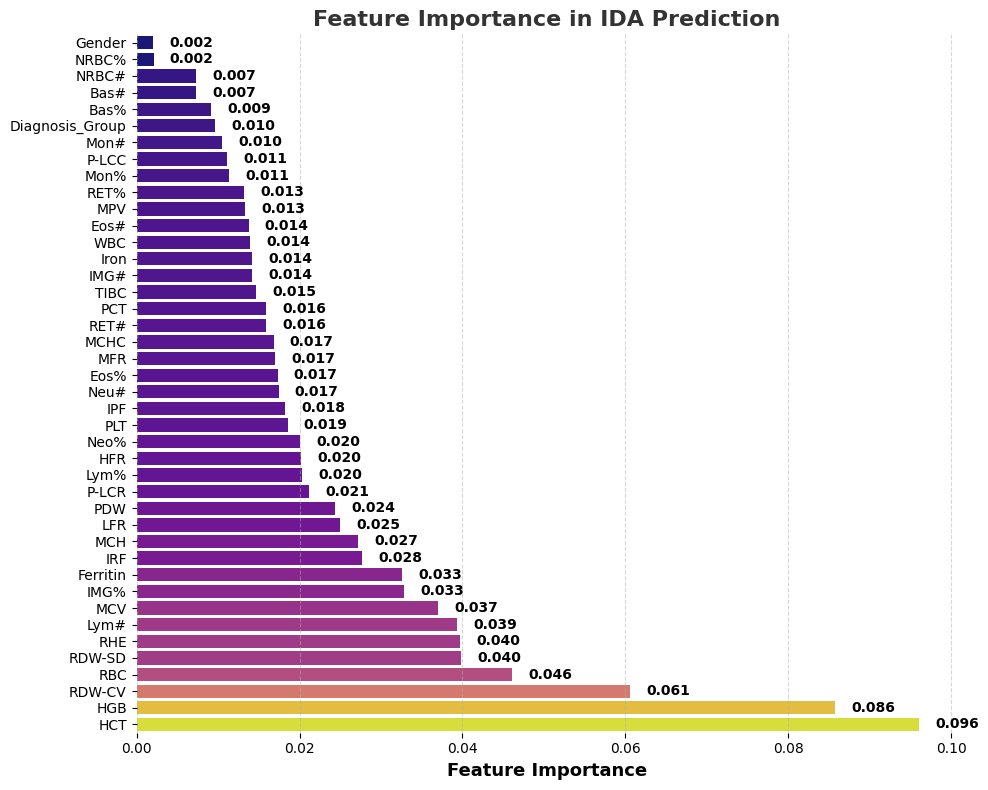

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# استخراج اهمیت ویژگی‌ها
importances = model.feature_importances_
feature_names = X.columns

# دیتافریم
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# رنگ‌ها بر اساس مقدار اهمیت
norm = plt.Normalize(importance_df["Importance"].min(), importance_df["Importance"].max())
colors = plt.cm.plasma(norm(importance_df["Importance"]))

# رسم نمودار
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df,
    palette=colors
)

# نمایش اعداد روی ستون‌ها
for i, val in enumerate(importance_df["Importance"]):
    ax.text(val + 0.002, i, f"{val:.3f}", va='center',
            fontsize=10, fontweight='bold', color='black')

# عنوان و برچسب‌ها
plt.xlabel("Feature Importance", fontsize=13, fontweight='bold')
plt.ylabel("")
plt.title("Feature Importance in IDA Prediction", fontsize=16, fontweight='bold', color="#333333")

# مرتب‌سازی: مهم‌ترین ویژگی‌ها بالا
ax.invert_yaxis()

# استایل تمیز
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


/var/folders/x5/fs2nh6kn1zj2_5vmnq88xykw0000gn/T/ipykernel_4234/1346384503.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/alihaghighat/.pyenv/versions/3.9.18/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


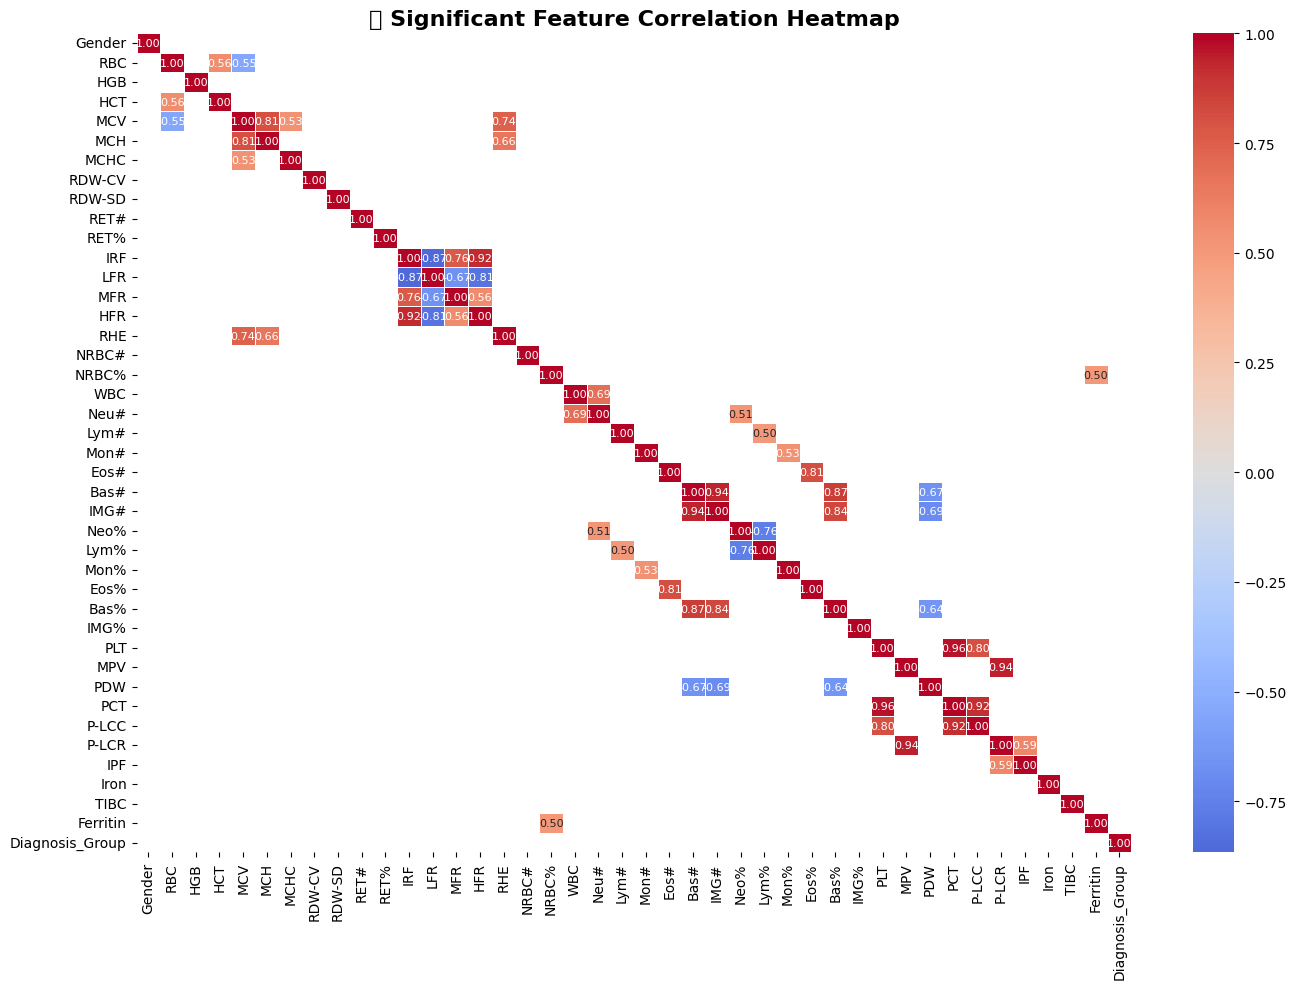

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# محاسبه ماتریس همبستگی
correlation_matrix = X.corr()

# آستانه برای معنی‌دار بودن
threshold = 0.5
mask = correlation_matrix.abs() < threshold

# مقادیر کم‌اهمیت رو NaN می‌کنیم تا سفید نمایش داده بشن
corr_filtered = correlation_matrix.mask(mask)

# رسم heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_filtered,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    center=0,
    annot_kws={"size": 8}
)
plt.title("🔍 Significant Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [50]:
df = df.drop(columns=["RBC Message", "WBC message", "PLT message", "Iron", "TIBC", "Ferritin"])
df=df.drop(columns=['Ward'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 461
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample ID        444 non-null    object 
 1   Gender           444 non-null    int64  
 2   RBC              444 non-null    float64
 3   HGB              444 non-null    float64
 4   HCT              444 non-null    float64
 5   MCV              444 non-null    float64
 6   MCH              444 non-null    float64
 7   MCHC             444 non-null    float64
 8   RDW-CV           444 non-null    float64
 9   RDW-SD           444 non-null    float64
 10  RET#             444 non-null    float64
 11  RET%             444 non-null    float64
 12  IRF              444 non-null    float64
 13  LFR              444 non-null    float64
 14  MFR              444 non-null    float64
 15  HFR              444 non-null    float64
 16  RHE              444 non-null    float64
 17  NRBC#            444 

In [52]:
# حذف ستون Sample ID چون نقش پیش‌بینی نداره
df = df.drop(columns=["Sample ID"])



In [53]:
# فیلتر کردن ردیف‌هایی که حداقل یک مقدار NaN دارند
nan_rows = df[df.isna().any(axis=1)]

# نمایش اولین چند ردیف
print("🔍 ردیف‌هایی که شامل مقدار گمشده (NaN) هستند:")
print(nan_rows.head())

# نمایش تعداد کل ردیف‌های ناقص
print(f"\n📌 تعداد کل ردیف‌های دارای NaN: {len(nan_rows)}")


🔍 ردیف‌هایی که شامل مقدار گمشده (NaN) هستند:
     Gender   RBC  HGB   HCT    MCV   MCH  MCHC  RDW-CV     RDW-SD    RET#  \
6         1  4.46  8.9  29.6   63.9  19.2  30.1    19.9  47.000000  0.0971   
395       1  2.13  7.1  22.7  106.5  33.4  31.3    17.3  67.200000  0.2254   
398       0  2.79  6.1  20.1   72.2  21.8  30.3    21.1  54.300000  0.0552   
407       1  2.46  7.4  23.3   94.9  30.2  31.8    27.4  48.704608  0.0772   
432       1  3.60  9.4  27.7   76.9  26.1  33.9    18.3  51.400000  0.3640   

     ...    PCT  P-LCC  P-LCR   IPF  Diagnosis_Group  WBC_outlier  PLT_high  \
6    ...  0.209   80.0   43.8   5.0                6        False     False   
395  ...  0.298   83.0   29.8   2.5                0        False     False   
398  ...  0.129   42.0   36.1   9.2                6        False     False   
407  ...  0.072   16.0   21.1   3.7                6        False     False   
432  ...  0.052   20.0   40.7  19.1                5        False     False   

     MPV_hi

In [54]:
# محاسبه تعداد مقادیر NaN در هر ستون
missing_values = df.isna().sum()
# فقط ستون‌هایی که حداقل یک NaN دارند
missing_values = missing_values[missing_values > 0]

# مرتب‌سازی نزولی و چاپ
missing_values = missing_values.sort_values(ascending=False)

print("🔍 ستون‌هایی که شامل مقدار گمشده (NaN) هستند:")
print(missing_values)



🔍 ستون‌هایی که شامل مقدار گمشده (NaN) هستند:
Mon#    7
Mon%    7
Bas#    6
Eos#    5
IMG#    5
Eos%    5
Bas%    5
dtype: int64


In [55]:
df=df.fillna(df.mean(numeric_only=True))

In [56]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
df.info()
# فرض: df دیتافریم کامل با ستون IDA_Label

X = df.drop(columns=["IDA_Label"])
y = df["IDA_Label"]

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# اعمال SMOTE فقط روی داده‌ی آموزشی
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# نمایش توزیع جدید برچسب‌ها
print("✅ توزیع برچسب‌ها پس از SMOTE:")
print(pd.Series(y_train_sm).value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 461
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           444 non-null    int64  
 1   RBC              444 non-null    float64
 2   HGB              444 non-null    float64
 3   HCT              444 non-null    float64
 4   MCV              444 non-null    float64
 5   MCH              444 non-null    float64
 6   MCHC             444 non-null    float64
 7   RDW-CV           444 non-null    float64
 8   RDW-SD           444 non-null    float64
 9   RET#             444 non-null    float64
 10  RET%             444 non-null    float64
 11  IRF              444 non-null    float64
 12  LFR              444 non-null    float64
 13  MFR              444 non-null    float64
 14  HFR              444 non-null    float64
 15  RHE              444 non-null    float64
 16  NRBC#            444 non-null    float64
 17  NRBC%            444 

/Users/alihaghighat/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [57]:
from sklearn.preprocessing import MinMaxScaler

# ساخت نمونه‌ای از MinMaxScaler
scaler = MinMaxScaler()

# نرمال‌سازی داده‌های آموزشی و آزمون
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)
X_train_sm_scaled_df = pd.DataFrame(X_train_sm_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
print("✅ داده‌های نرمال‌شده (آموزش):")
print(X_train_sm_scaled_df.head())

✅ داده‌های نرمال‌شده (آموزش):
   Gender       RBC       HGB       HCT       MCV       MCH      MCHC  \
0     1.0  0.414246  0.271676  0.198746  0.543384  0.178105  0.726316   
1     0.0  0.313027  0.268786  0.184953  0.716920  0.282680  0.821053   
2     1.0  0.331771  0.242775  0.163636  0.567245  0.215686  0.852632   
3     0.0  0.335520  0.205202  0.136677  0.437093  0.160131  0.873684   
4     0.0  0.306467  0.193642  0.147962  0.553145  0.168301  0.673684   

     RDW-CV    RDW-SD      RET#  ...       PDW       PCT     P-LCC     P-LCR  \
0  0.018573  0.084507  0.046679  ...  0.868056  0.328373  0.418773  0.518051   
1  0.031281  0.366197  0.020393  ...  0.881944  0.223615  0.216606  0.234657   
2  0.032258  0.194836  0.022750  ...  0.854167  0.088506  0.155235  1.000000   
3  0.059629  0.183099  0.030071  ...  0.826389  0.476209  0.447653  0.202166   
4  0.282502  0.387432  0.046750  ...  0.805556  0.164872  0.169675  0.216606   

        IPF  Diagnosis_Group  WBC_outlier  PLT_hig

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# تابع مخصوص محاسبه Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# تعریف scorer‌ها
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'  # 👈 اینجا دیگه make_scorer استفاده نمی‌کنیم
}

# مدل
rf_model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# اجرای cross-validation
cv_results = cross_validate(rf_model, X_train_sm_scaled_df, y_train_sm, cv=cv, scoring=scoring)

# میانگین نتایج
print("✅ نتایج میانگین ارزیابی مدل Random Forest با Cross-Validation:")
print(f"Accuracy:      {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Sensitivity:   {np.mean(cv_results['test_sensitivity']):.4f}")
print(f"Specificity:   {np.mean(cv_results['test_specificity']):.4f}")
print(f"AUC-ROC:       {np.mean(cv_results['test_roc_auc']):.4f}")


✅ نتایج میانگین ارزیابی مدل Random Forest با Cross-Validation:
Accuracy:      0.9221
Sensitivity:   0.9057
Specificity:   0.9390
AUC-ROC:       0.9792


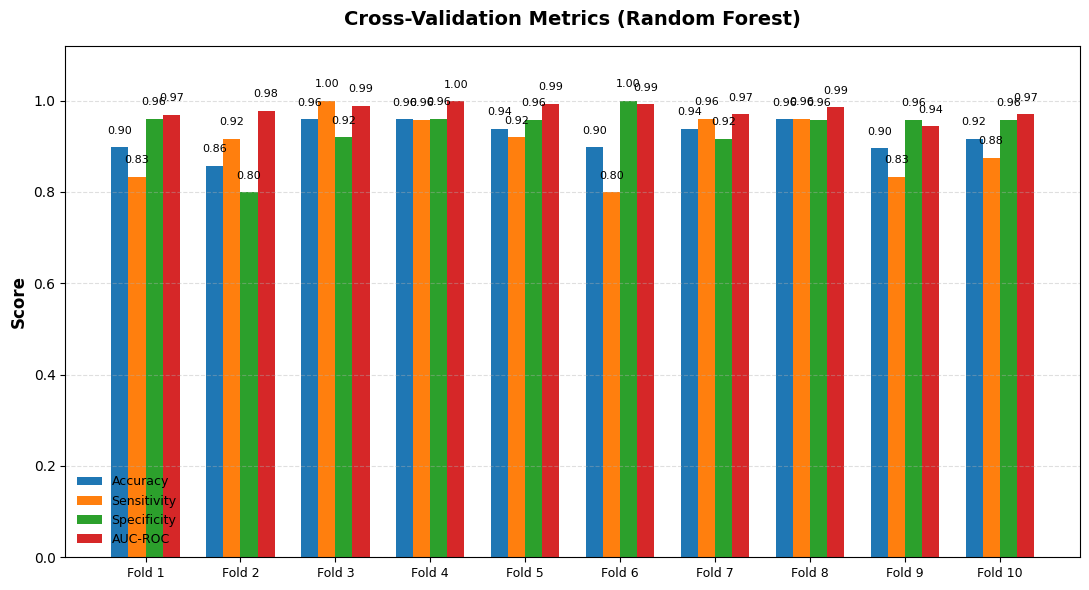

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# فرض: این مقادیر از خروجی cross_validate به‌دست اومدن
accuracy_scores = cv_results['test_accuracy']
sensitivity_scores = cv_results['test_sensitivity']
specificity_scores = cv_results['test_specificity']
auc_scores = cv_results['test_roc_auc']

# تنظیم محور X برای هر فولد
labels = [f"Fold {i+1}" for i in range(len(accuracy_scores))]
x = np.arange(len(labels))
width = 0.18

# رنگ‌ها از پالت tab10
colors = plt.get_cmap("tab10").colors

plt.figure(figsize=(11, 6), facecolor="white")

# رسم ستون‌ها
bars_acc = plt.bar(x - 1.5 * width, accuracy_scores, width, label='Accuracy', color=colors[0])
bars_sens = plt.bar(x - 0.5 * width, sensitivity_scores, width, label='Sensitivity', color=colors[1])
bars_spec = plt.bar(x + 0.5 * width, specificity_scores, width, label='Specificity', color=colors[2])
bars_auc = plt.bar(x + 1.5 * width, auc_scores, width, label='AUC-ROC', color=colors[3])

# تابع برای افزودن مقادیر بالای ستون‌ها
def add_labels(bars, color="black"):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.025,
                 f"{height:.2f}", ha='center', va='bottom',
                 fontsize=8, color=color)

add_labels(bars_acc)
add_labels(bars_sens)
add_labels(bars_spec)
add_labels(bars_auc)

# استایل محور و عنوان
plt.xticks(x, labels, fontsize=9)
plt.ylim(0, 1.12)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Cross-Validation Metrics (Random Forest)", fontsize=14, fontweight='bold', pad=15)

# grid ملایم
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

# legend تمیز
plt.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# آموزش مدل روی کل داده آموزش
rf_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی روی داده تست
y_pred = rf_model.predict(X_test_scaled_df)
y_proba = rf_model.predict_proba(X_test_scaled_df)[:, 1]  # احتمال کلاس مثبت (1) برای AUC

# محاسبه متریک‌ها
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, pos_label=1)

# محاسبه Specificity
cm = confusion_matrix(y_test, y_pred)
tn = cm[0, 0]
fp = cm[0, 1]
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# محاسبه AUC
auc = roc_auc_score(y_test, y_proba)

# چاپ نتایج
print("✅ ارزیابی نهایی روی داده تست:")
print(f"Accuracy:      {accuracy:.4f}")
print(f"Sensitivity:   {sensitivity:.4f}")
print(f"Specificity:   {specificity:.4f}")
print(f"AUC-ROC:       {auc:.4f}")


✅ ارزیابی نهایی روی داده تست:
Accuracy:      0.8806
Sensitivity:   0.9340
Specificity:   0.6786
AUC-ROC:       0.9178


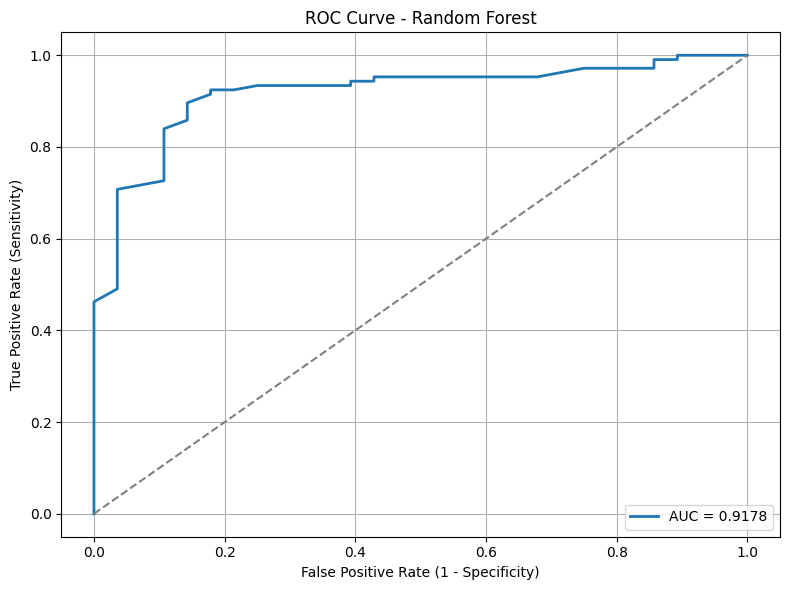

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# پیش‌بینی احتمالات برای کلاس مثبت (مثلاً کلاس 1)
y_proba = rf_model.predict_proba(X_test_scaled_df)[:, 1]

# محاسبه FPR، TPR
fpr, tpr, _ = roc_curve(y_test, y_proba)

# محاسبه AUC
auc = roc_auc_score(y_test, y_proba)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# تابع محاسبه Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# تعریف scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# مدل SVM با خروجی احتمالاتی
svm_model = SVC(kernel='poly', probability=True, random_state=42)

# تنظیم Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# اجرای cross-validation
svm_cv_results = cross_validate(svm_model, X_train_sm_scaled_df, y_train_sm, cv=cv, scoring=scoring)

# چاپ نتایج میانگین
print("✅ نتایج میانگین ارزیابی مدل SVM با Cross-Validation:")
print(f"Accuracy:      {np.mean(svm_cv_results['test_accuracy']):.4f}")
print(f"Sensitivity:   {np.mean(svm_cv_results['test_sensitivity']):.4f}")
print(f"Specificity:   {np.mean(svm_cv_results['test_specificity']):.4f}")
print(f"AUC-ROC:       {np.mean(svm_cv_results['test_roc_auc']):.4f}")


✅ نتایج میانگین ارزیابی مدل SVM با Cross-Validation:
Accuracy:      0.8420
Sensitivity:   0.7655
Specificity:   0.9185
AUC-ROC:       0.9015


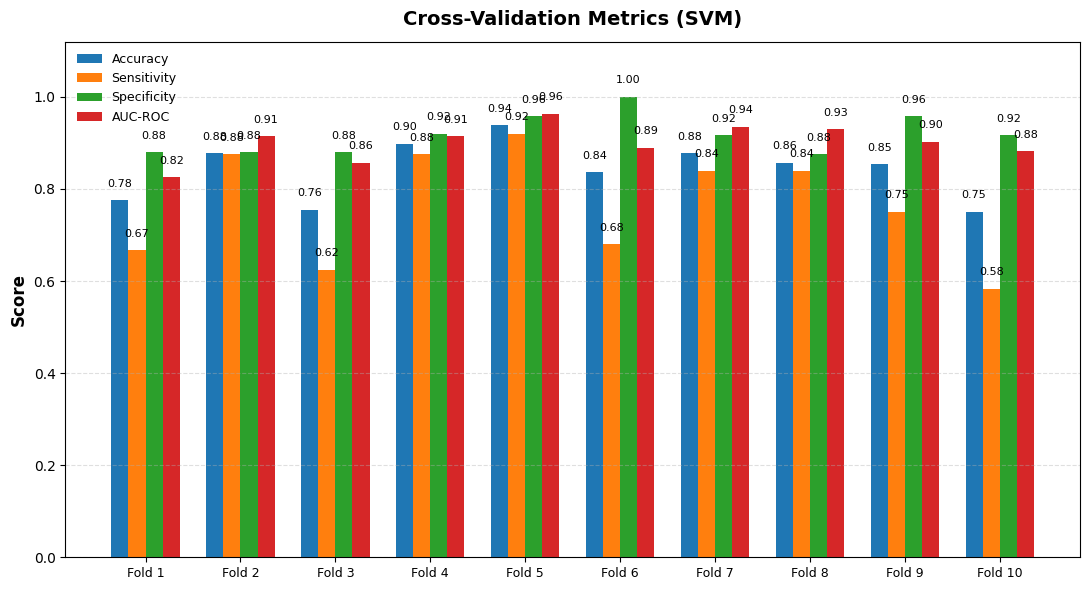

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر از خروجی cross_validate برای SVM
accuracy_scores = svm_cv_results['test_accuracy']
sensitivity_scores = svm_cv_results['test_sensitivity']
specificity_scores = svm_cv_results['test_specificity']
auc_scores = svm_cv_results['test_roc_auc']

# برچسب‌ها برای هر Fold
labels = [f"Fold {i+1}" for i in range(len(accuracy_scores))]
x = np.arange(len(labels))

# اگر فولد زیاد شد، عرض ستون‌ها منطقی بمونه
width = 0.18 if len(labels) >= 8 else 0.2

# پالت رنگ
colors = plt.get_cmap("tab10").colors

plt.figure(figsize=(11, 6), facecolor="white")

# ستون‌ها
bars_acc = plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy',    color=colors[0])
bars_sen = plt.bar(x - 0.5*width, sensitivity_scores, width, label='Sensitivity', color=colors[1])
bars_spec= plt.bar(x + 0.5*width, specificity_scores, width, label='Specificity', color=colors[2])
bars_auc = plt.bar(x + 1.5*width, auc_scores, width, label='AUC-ROC',          color=colors[3])

# تابع نوشتن مقادیر روی ستون‌ها
def add_labels(bars):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + 0.025, f"{h:.2f}",
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_acc)
add_labels(bars_sen)
add_labels(bars_spec)
add_labels(bars_auc)

# استایل کلی
plt.xticks(x, labels, fontsize=9)
plt.ylim(0, 1.12)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Cross-Validation Metrics (SVM)", fontsize=14, fontweight='bold', pad=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend(frameon=False, fontsize=9)
plt.tight_layout()
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# آموزش مدل SVM روی داده آموزش
svm_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی برچسب و احتمال روی داده تست
y_pred_svm = svm_model.predict(X_test_scaled_df)
y_proba_svm = svm_model.predict_proba(X_test_scaled_df)[:, 1]

# محاسبه Accuracy و Sensitivity
accuracy_svm = accuracy_score(y_test, y_pred_svm)
sensitivity_svm = recall_score(y_test, y_pred_svm, pos_label=1)

# محاسبه Specificity
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm = cm_svm[0, 0]
fp_svm = cm_svm[0, 1]
specificity_svm = tn_svm / (tn_svm + fp_svm) if (tn_svm + fp_svm) > 0 else 0

# محاسبه AUC-ROC
auc_svm = roc_auc_score(y_test, y_proba_svm)

# نمایش نتایج
print("✅ ارزیابی نهایی SVM روی داده تست:")
print(f"Accuracy:      {accuracy_svm:.4f}")
print(f"Sensitivity:   {sensitivity_svm:.4f}")
print(f"Specificity:   {specificity_svm:.4f}")
print(f"AUC-ROC:       {auc_svm:.4f}")


✅ ارزیابی نهایی SVM روی داده تست:
Accuracy:      0.7687
Sensitivity:   0.7453
Specificity:   0.8571
AUC-ROC:       0.8750


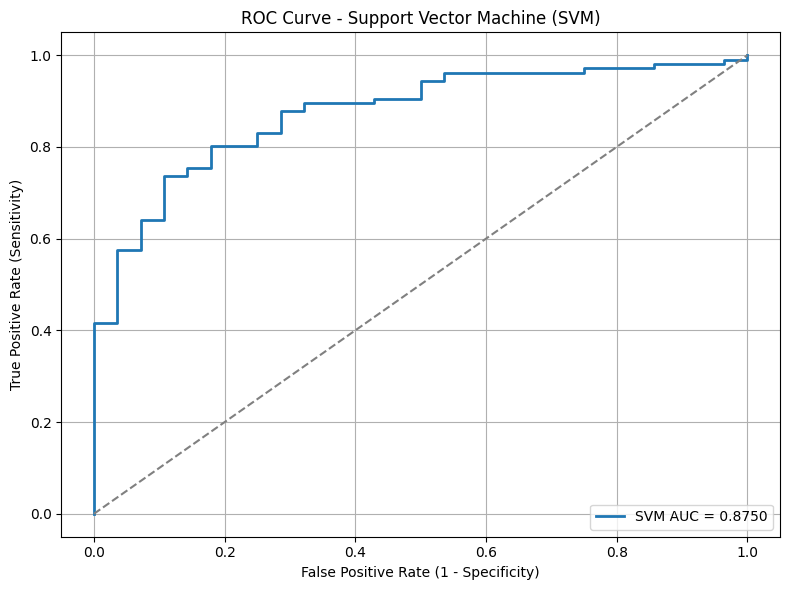

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# آموزش مدل SVM روی داده آموزش
svm_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی احتمال کلاس 1 روی داده تست
y_proba_svm = svm_model.predict_proba(X_test_scaled_df)[:, 1]

# محاسبه FPR و TPR
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

# رسم نمودار ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM AUC = {auc_svm:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Support Vector Machine (SVM)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# تابع محاسبه Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# تعریف scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# مدل Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# تنظیم Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# اجرای cross-validation
dt_cv_results = cross_validate(dt_model, X_train_sm_scaled_df, y_train_sm, cv=cv, scoring=scoring)

# چاپ نتایج میانگین
print("✅ نتایج میانگین ارزیابی مدل Decision Tree با Cross-Validation:")
print(f"Accuracy:      {np.mean(dt_cv_results['test_accuracy']):.4f}")
print(f"Sensitivity:   {np.mean(dt_cv_results['test_sensitivity']):.4f}")
print(f"Specificity:   {np.mean(dt_cv_results['test_specificity']):.4f}")
print(f"AUC-ROC:       {np.mean(dt_cv_results['test_roc_auc']):.4f}")


✅ نتایج میانگین ارزیابی مدل Decision Tree با Cross-Validation:
Accuracy:      0.8769
Sensitivity:   0.8645
Specificity:   0.8897
AUC-ROC:       0.8771


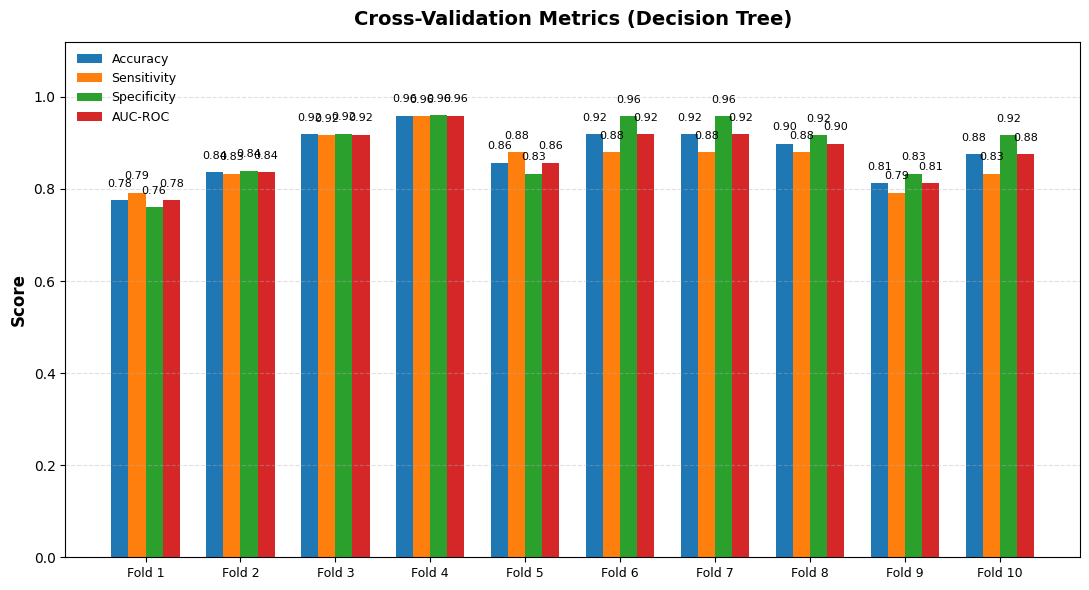

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر از خروجی cross_validate برای Decision Tree
accuracy_scores = dt_cv_results['test_accuracy']
sensitivity_scores = dt_cv_results['test_sensitivity']
specificity_scores = dt_cv_results['test_specificity']
auc_scores = dt_cv_results['test_roc_auc']

# برچسب‌ها برای هر Fold
labels = [f"Fold {i+1}" for i in range(len(accuracy_scores))]
x = np.arange(len(labels))
width = 0.18  # کمی باریک‌تر برای فاصله بیشتر

# رنگ‌ها از پالت tab10
colors = plt.get_cmap("tab10").colors

plt.figure(figsize=(11, 6), facecolor="white")

# رسم ستون‌ها
bars_acc  = plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy',    color=colors[0])
bars_sens = plt.bar(x - 0.5*width, sensitivity_scores, width, label='Sensitivity', color=colors[1])
bars_spec = plt.bar(x + 0.5*width, specificity_scores, width, label='Specificity', color=colors[2])
bars_auc  = plt.bar(x + 1.5*width, auc_scores, width, label='AUC-ROC',          color=colors[3])

# افزودن مقادیر روی ستون‌ها
def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.025, f"{h:.2f}",
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_acc)
add_labels(bars_sens)
add_labels(bars_spec)
add_labels(bars_auc)

# استایل
plt.xticks(x, labels, fontsize=9)
plt.ylim(0, 1.12)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Cross-Validation Metrics (Decision Tree)", fontsize=14, fontweight='bold', pad=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend(frameon=False, fontsize=9)
plt.tight_layout()
plt.show()


In [68]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# آموزش مدل روی داده آموزش
dt_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی برچسب و احتمال روی داده تست
y_pred_dt = dt_model.predict(X_test_scaled_df)
y_proba_dt = dt_model.predict_proba(X_test_scaled_df)[:, 1]

# محاسبه متریک‌ها
accuracy_dt = accuracy_score(y_test, y_pred_dt)
sensitivity_dt = recall_score(y_test, y_pred_dt, pos_label=1)

cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt = cm_dt[0, 0]
fp_dt = cm_dt[0, 1]
specificity_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) > 0 else 0

auc_dt = roc_auc_score(y_test, y_proba_dt)

print("✅ ارزیابی نهایی Decision Tree روی داده تست:")
print(f"Accuracy:      {accuracy_dt:.4f}")
print(f"Sensitivity:   {sensitivity_dt:.4f}")
print(f"Specificity:   {specificity_dt:.4f}")
print(f"AUC-ROC:       {auc_dt:.4f}")


✅ ارزیابی نهایی Decision Tree روی داده تست:
Accuracy:      0.8582
Sensitivity:   0.9057
Specificity:   0.6786
AUC-ROC:       0.7921


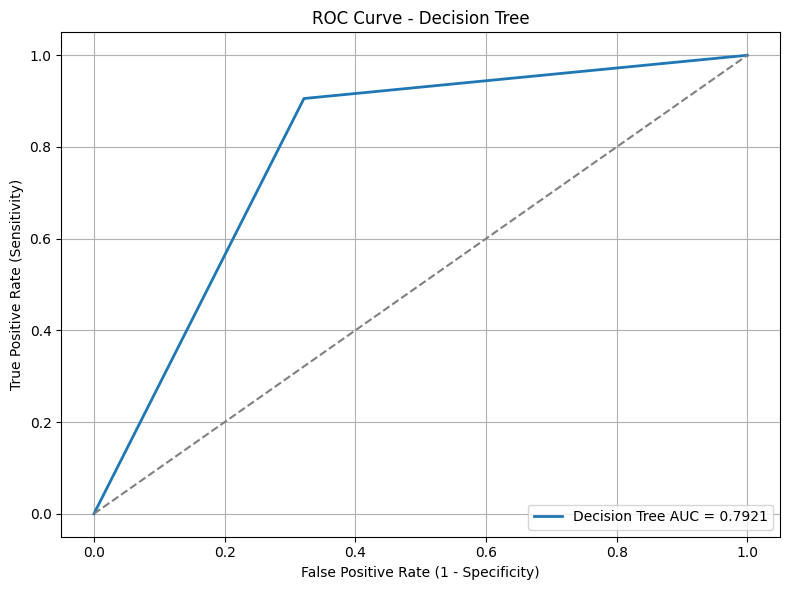

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# محاسبه FPR و TPR
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# رسم نمودار ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree AUC = {auc_dt:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# تابع محاسبه Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# تعریف scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# مدل Naive Bayes
nb_model = GaussianNB()

# تنظیم Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# اجرای cross-validation
nb_cv_results = cross_validate(nb_model, X_train_sm_scaled_df, y_train_sm, cv=cv, scoring=scoring)

# چاپ نتایج میانگین
print("✅ نتایج میانگین ارزیابی مدل Naive Bayes با Cross-Validation:")
print(f"Accuracy:      {np.mean(nb_cv_results['test_accuracy']):.4f}")
print(f"Sensitivity:   {np.mean(nb_cv_results['test_sensitivity']):.4f}")
print(f"Specificity:   {np.mean(nb_cv_results['test_specificity']):.4f}")
print(f"AUC-ROC:       {np.mean(nb_cv_results['test_roc_auc']):.4f}")


✅ نتایج میانگین ارزیابی مدل Naive Bayes با Cross-Validation:
Accuracy:      0.7210
Sensitivity:   0.4745
Specificity:   0.9672
AUC-ROC:       0.9091


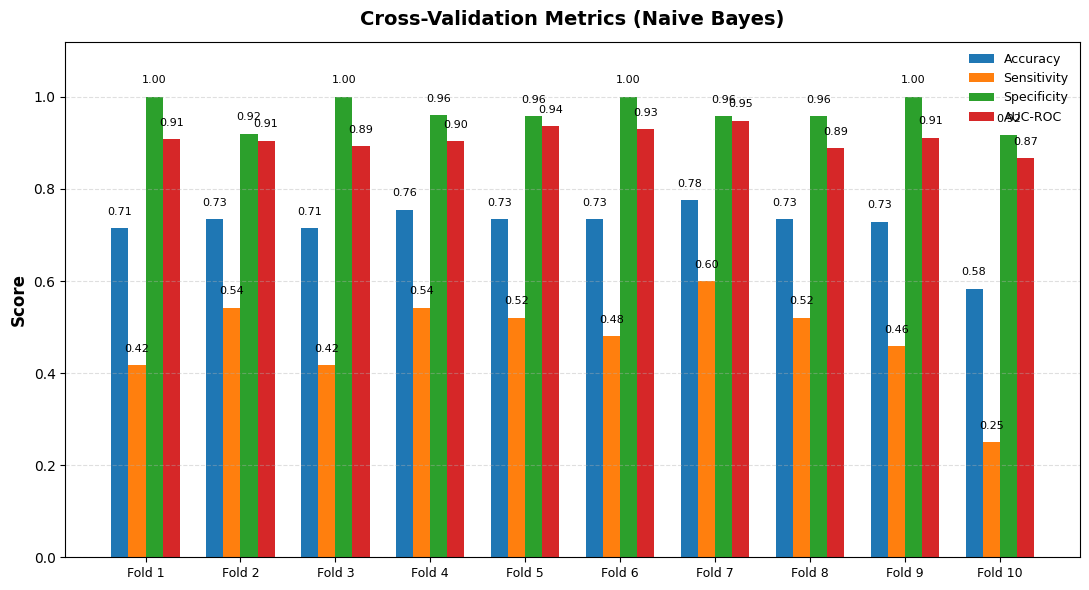

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر از خروجی cross_validate برای Naive Bayes
accuracy_scores   = nb_cv_results['test_accuracy']
sensitivity_scores= nb_cv_results['test_sensitivity']
specificity_scores= nb_cv_results['test_specificity']
auc_scores        = nb_cv_results['test_roc_auc']

# برچسب‌ها برای هر Fold
labels = [f"Fold {i+1}" for i in range(len(accuracy_scores))]
x = np.arange(len(labels))
width = 0.18 if len(labels) >= 8 else 0.2  # کمی باریک‌تر برای فاصله‌ی بهتر

# رنگ‌ها از پالت tab10
colors = plt.get_cmap("tab10").colors

plt.figure(figsize=(11, 6), facecolor="white")

# رسم ستون‌ها
bars_acc  = plt.bar(x - 1.5*width, accuracy_scores,    width, label='Accuracy',    color=colors[0])
bars_sens = plt.bar(x - 0.5*width, sensitivity_scores, width, label='Sensitivity', color=colors[1])
bars_spec = plt.bar(x + 0.5*width, specificity_scores, width, label='Specificity', color=colors[2])
bars_auc  = plt.bar(x + 1.5*width, auc_scores,         width, label='AUC-ROC',     color=colors[3])

# افزودن مقادیر روی ستون‌ها
def add_labels(bars):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + 0.025, f"{h:.2f}",
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_acc)
add_labels(bars_sens)
add_labels(bars_spec)
add_labels(bars_auc)

# استایل و عنوان‌ها
plt.xticks(x, labels, fontsize=9)
plt.ylim(0, 1.12)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Cross-Validation Metrics (Naive Bayes)", fontsize=14, fontweight='bold', pad=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


In [72]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# آموزش مدل روی داده آموزش
nb_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی برچسب و احتمال روی داده تست
y_pred_nb = nb_model.predict(X_test_scaled_df)
y_proba_nb = nb_model.predict_proba(X_test_scaled_df)[:, 1]

# محاسبه متریک‌ها
accuracy_nb = accuracy_score(y_test, y_pred_nb)
sensitivity_nb = recall_score(y_test, y_pred_nb, pos_label=1)

cm_nb = confusion_matrix(y_test, y_pred_nb)
tn_nb = cm_nb[0, 0]
fp_nb = cm_nb[0, 1]
specificity_nb = tn_nb / (tn_nb + fp_nb) if (tn_nb + fp_nb) > 0 else 0

auc_nb = roc_auc_score(y_test, y_proba_nb)

print("✅ ارزیابی نهایی Naive Bayes روی داده تست:")
print(f"Accuracy:      {accuracy_nb:.4f}")
print(f"Sensitivity:   {sensitivity_nb:.4f}")
print(f"Specificity:   {specificity_nb:.4f}")
print(f"AUC-ROC:       {auc_nb:.4f}")


✅ ارزیابی نهایی Naive Bayes روی داده تست:
Accuracy:      0.5896
Sensitivity:   0.5094
Specificity:   0.8929
AUC-ROC:       0.8366


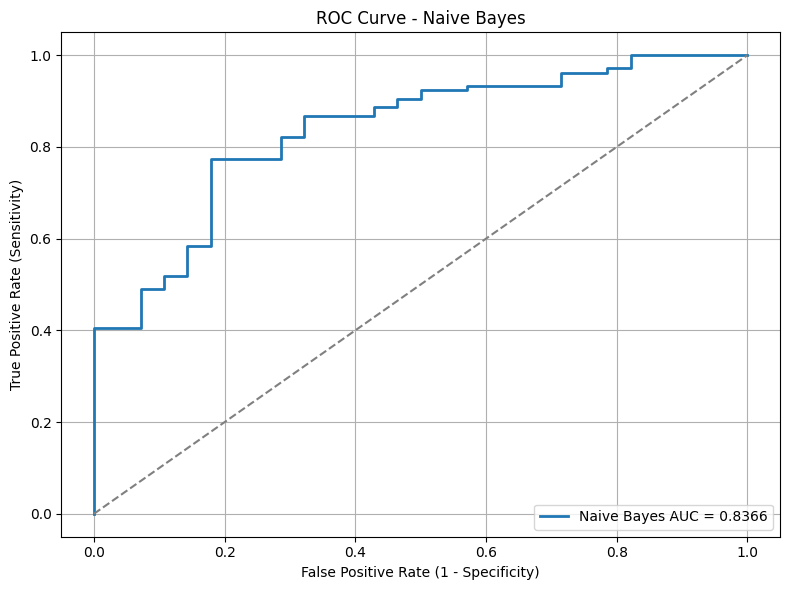

In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# محاسبه FPR و TPR برای رسم ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

# رسم نمودار ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes AUC = {auc_nb:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# تابع محاسبه Specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# تعریف scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# مدل CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cat_cv_results = cross_validate(cat_model, X_train_sm_scaled_df, y_train_sm, cv=cv, scoring=scoring)

# نمایش نتایج
print("✅ نتایج میانگین ارزیابی مدل CatBoost با Cross-Validation:")
print(f"Accuracy:      {np.mean(cat_cv_results['test_accuracy']):.4f}")
print(f"Sensitivity:   {np.mean(cat_cv_results['test_sensitivity']):.4f}")
print(f"Specificity:   {np.mean(cat_cv_results['test_specificity']):.4f}")
print(f"AUC-ROC:       {np.mean(cat_cv_results['test_roc_auc']):.4f}")


✅ نتایج میانگین ارزیابی مدل CatBoost با Cross-Validation:
Accuracy:      0.9241
Sensitivity:   0.8852
Specificity:   0.9633
AUC-ROC:       0.9783


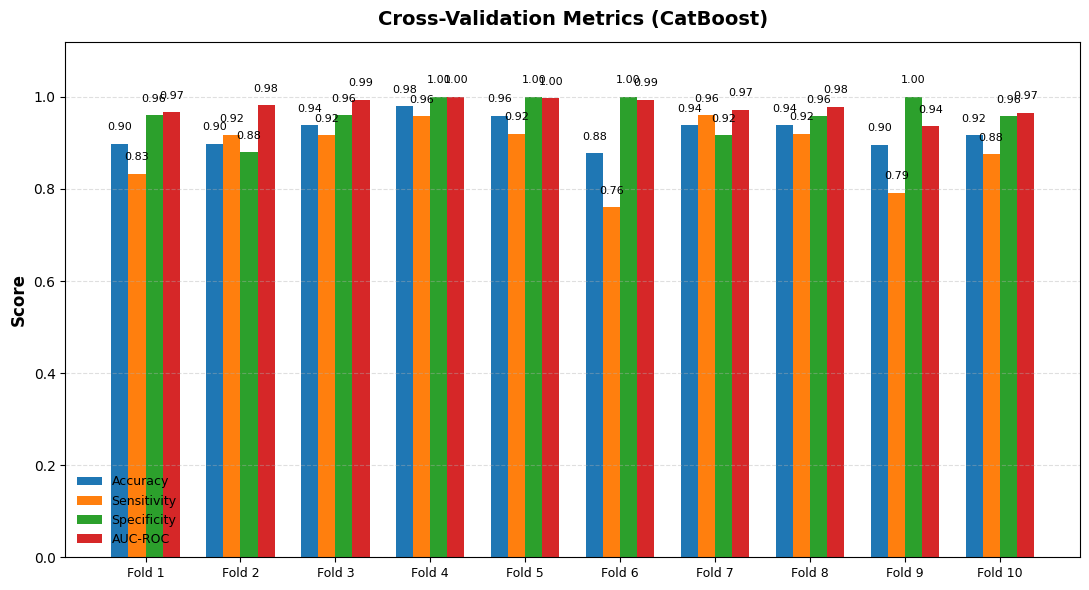

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر از خروجی cross_validate برای CatBoost
accuracy_scores   = cat_cv_results['test_accuracy']
sensitivity_scores= cat_cv_results['test_sensitivity']
specificity_scores= cat_cv_results['test_specificity']
auc_scores        = cat_cv_results['test_roc_auc']

# برچسب‌ها برای هر Fold
labels = [f"Fold {i+1}" for i in range(len(accuracy_scores))]
x = np.arange(len(labels))
width = 0.18 if len(labels) >= 8 else 0.2

# رنگ‌ها از پالت tab10
colors = plt.get_cmap("tab10").colors

plt.figure(figsize=(11, 6), facecolor="white")

# رسم ستون‌ها
bars_acc  = plt.bar(x - 1.5*width, accuracy_scores,    width, label='Accuracy',    color=colors[0])
bars_sens = plt.bar(x - 0.5*width, sensitivity_scores, width, label='Sensitivity', color=colors[1])
bars_spec = plt.bar(x + 0.5*width, specificity_scores, width, label='Specificity', color=colors[2])
bars_auc  = plt.bar(x + 1.5*width, auc_scores,         width, label='AUC-ROC',     color=colors[3])

# افزودن مقادیر روی ستون‌ها
def add_labels(bars):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + 0.025, f"{h:.2f}",
                 ha='center', va='bottom', fontsize=8)

add_labels(bars_acc)
add_labels(bars_sens)
add_labels(bars_spec)
add_labels(bars_auc)

# استایل و عنوان‌ها
plt.xticks(x, labels, fontsize=9)
plt.ylim(0, 1.12)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Cross-Validation Metrics (CatBoost)", fontsize=14, fontweight='bold', pad=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


In [81]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# آموزش مدل روی داده آموزش
cat_model.fit(X_train_sm_scaled_df, y_train_sm)

# پیش‌بینی روی تست
y_pred_cat = cat_model.predict(X_test_scaled_df)
y_proba_cat = cat_model.predict_proba(X_test_scaled_df)[:, 1]

# متریک‌ها
accuracy_cat = accuracy_score(y_test, y_pred_cat)
sensitivity_cat = recall_score(y_test, y_pred_cat, pos_label=1)
cm_cat = confusion_matrix(y_test, y_pred_cat)
tn_cat = cm_cat[0, 0]
fp_cat = cm_cat[0, 1]
specificity_cat = tn_cat / (tn_cat + fp_cat) if (tn_cat + fp_cat) > 0 else 0
auc_cat = roc_auc_score(y_test, y_proba_cat)

print("✅ ارزیابی نهایی CatBoost روی داده تست:")
print(f"Accuracy:      {accuracy_cat:.4f}")
print(f"Sensitivity:   {sensitivity_cat:.4f}")
print(f"Specificity:   {specificity_cat:.4f}")
print(f"AUC-ROC:       {auc_cat:.4f}")


✅ ارزیابی نهایی CatBoost روی داده تست:
Accuracy:      0.9030
Sensitivity:   0.9151
Specificity:   0.8571
AUC-ROC:       0.9282


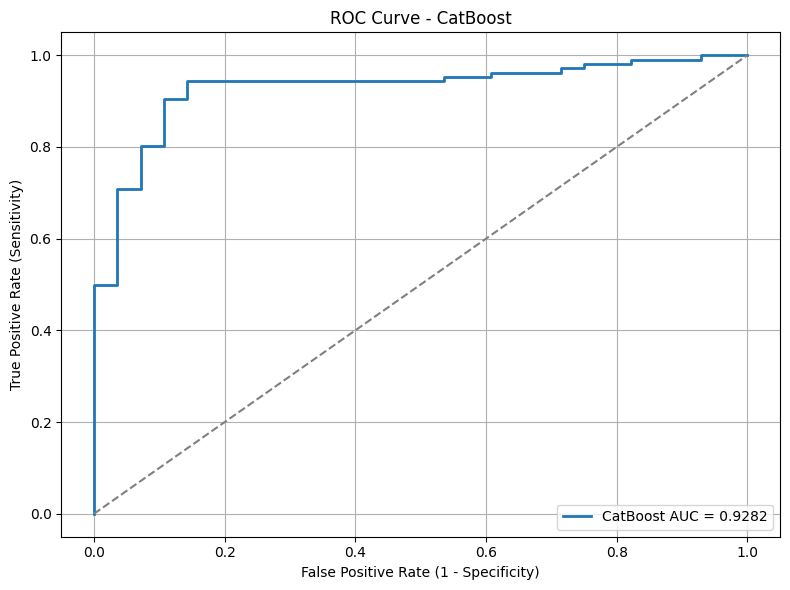

In [82]:
from sklearn.metrics import roc_curve

fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost AUC = {auc_cat:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - CatBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_auc_score, matthews_corrcoef
)

# تابع ارزیابی
def evaluate_model(y_test, y_pred, y_proba):
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp = cm[0, 0], cm[0, 1]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    return [accuracy, sensitivity, specificity, precision, f1, auc, mcc]

# مدل‌ها و نتایج پیش‌بینی‌شان
model_results = {
    "Random Forest": (y_pred, y_proba),
    "SVM": (y_pred_svm, y_proba_svm),
    "Decision Tree": (y_pred_dt, y_proba_dt),
    "Naive Bayes": (y_pred_nb, y_proba_nb),
    "CatBoost": (y_pred_cat, y_proba_cat)
}

# ساخت جدول نتایج
metrics_names = ["Accuracy", "Sensitivity", "Specificity", "Precision", "F1-Score", "AUC-ROC", "MCC"]
evaluation_table = {}

for model_name, (y_pred_model, y_proba_model) in model_results.items():
    evaluation_table[model_name] = evaluate_model(y_test, y_pred_model, y_proba_model)

# تبدیل به DataFrame
df_metrics = pd.DataFrame(evaluation_table, index=metrics_names).T.round(4)

# نمایش جدول
print("📊 جدول ارزیابی نهایی مدل‌ها روی داده تست:")
display(df_metrics)  # در Jupyter
# یا:
# print(df_metrics)


📊 جدول ارزیابی نهایی مدل‌ها روی داده تست:


,Accuracy,Sensitivity,Specificity,Precision,F1-Score,AUC-ROC,MCC
Random Forest,0.8806,0.9340,0.6786,0.9167,0.9252,0.9178,0.6297
SVM,0.7687,0.7453,0.8571,0.9518,0.8360,0.8750,0.5044
Decision Tree,0.8582,0.9057,0.6786,0.9143,0.9100,0.7921,0.5768
Naive Bayes,0.5896,0.5094,0.8929,0.9474,0.6626,0.8366,0.3308
CatBoost,0.9030,0.9151,0.8571,0.9604,0.9372,0.9282,0.7287


In [84]:
df_metrics.to_excel("model_comparison_results.xlsx", index=True)
print("✅ جدول با موفقیت در فایل 'model_comparison_results.xlsx' ذخیره شد.")


✅ جدول با موفقیت در فایل 'model_comparison_results.xlsx' ذخیره شد.


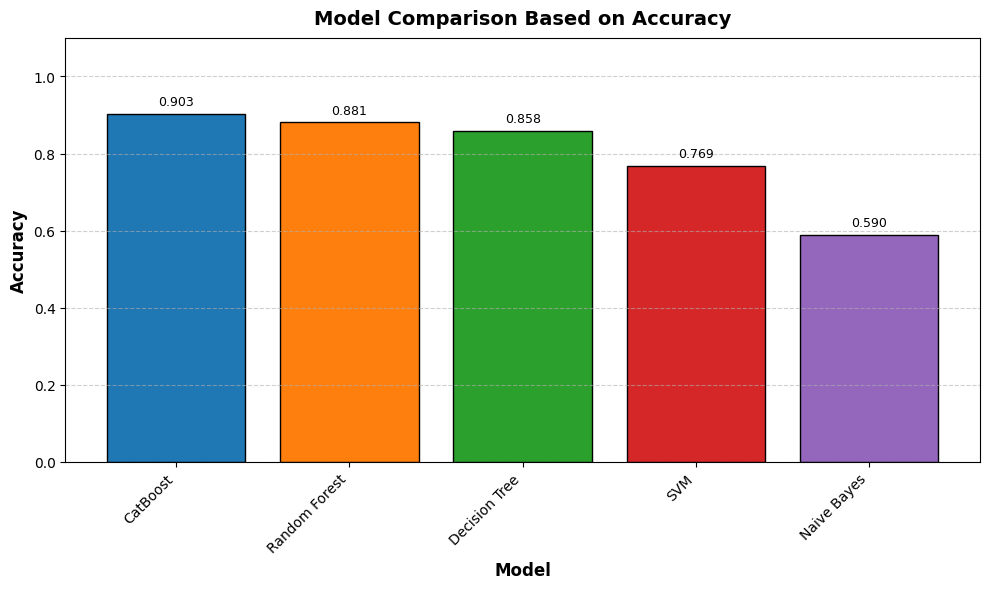

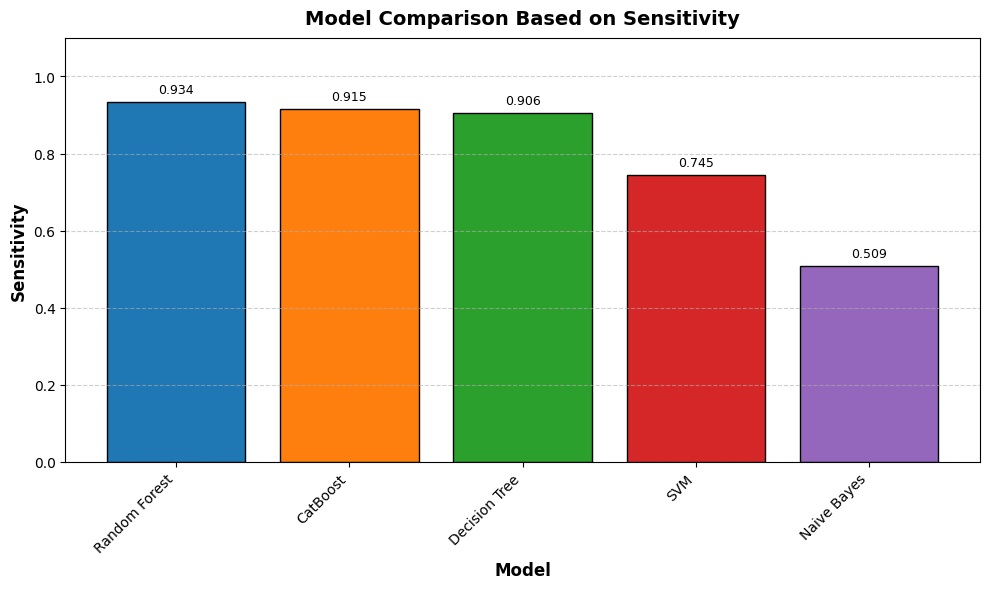

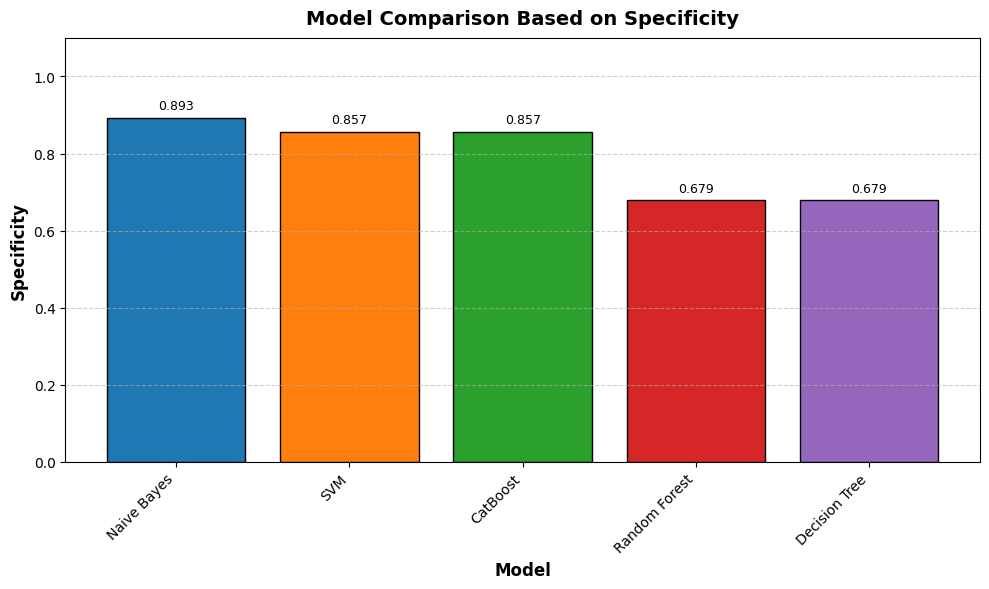

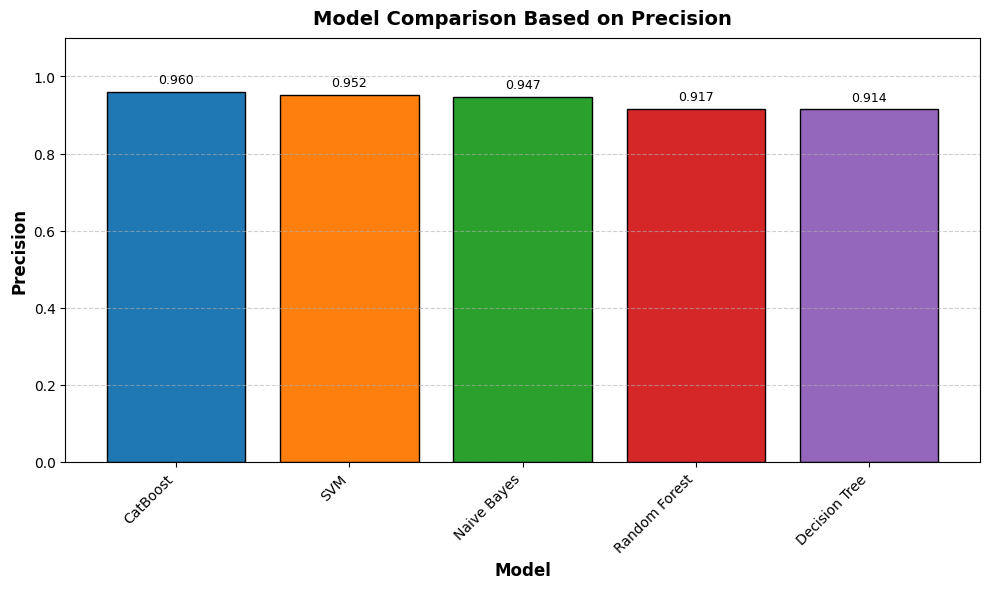

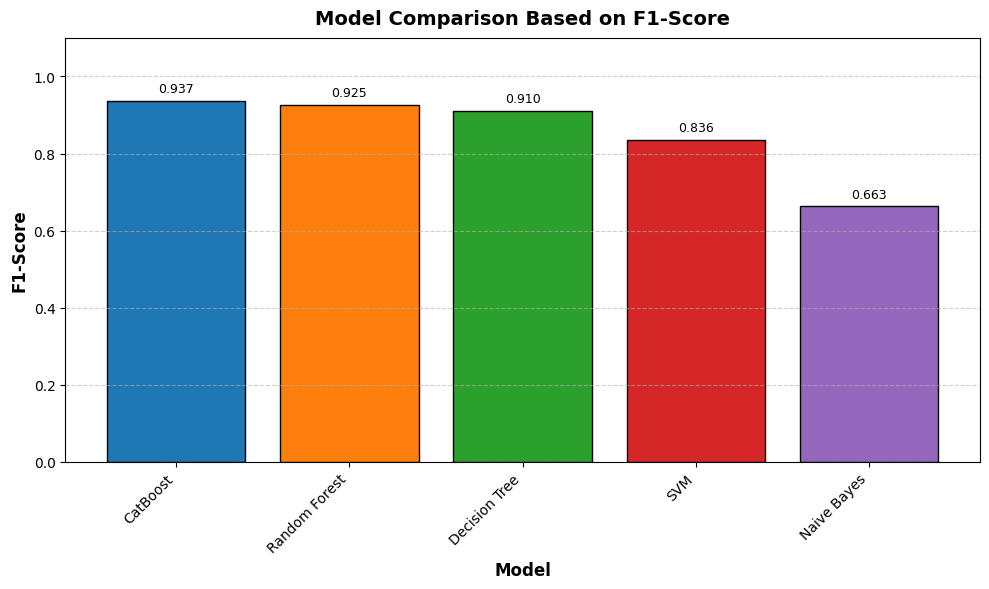

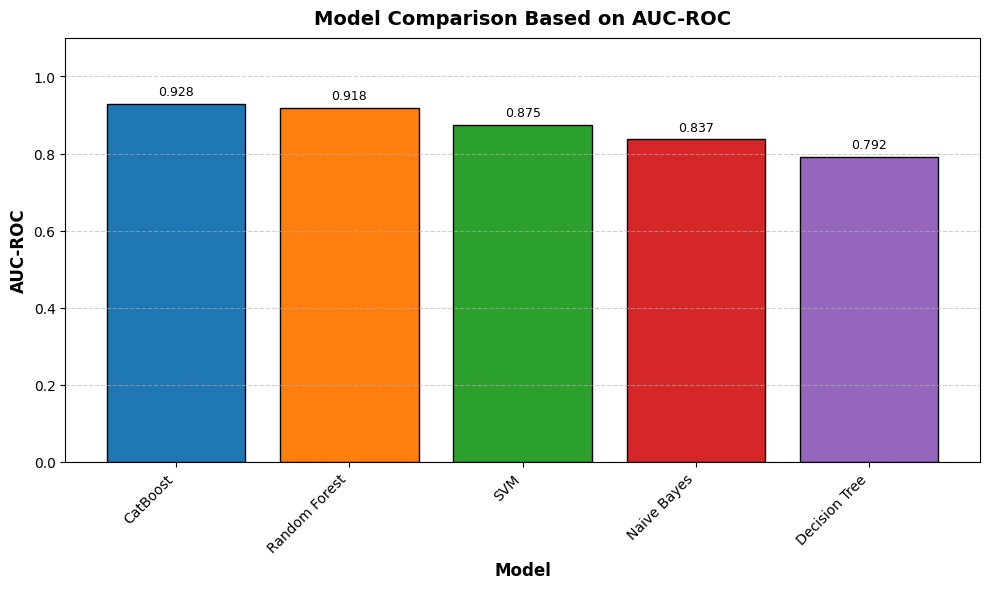

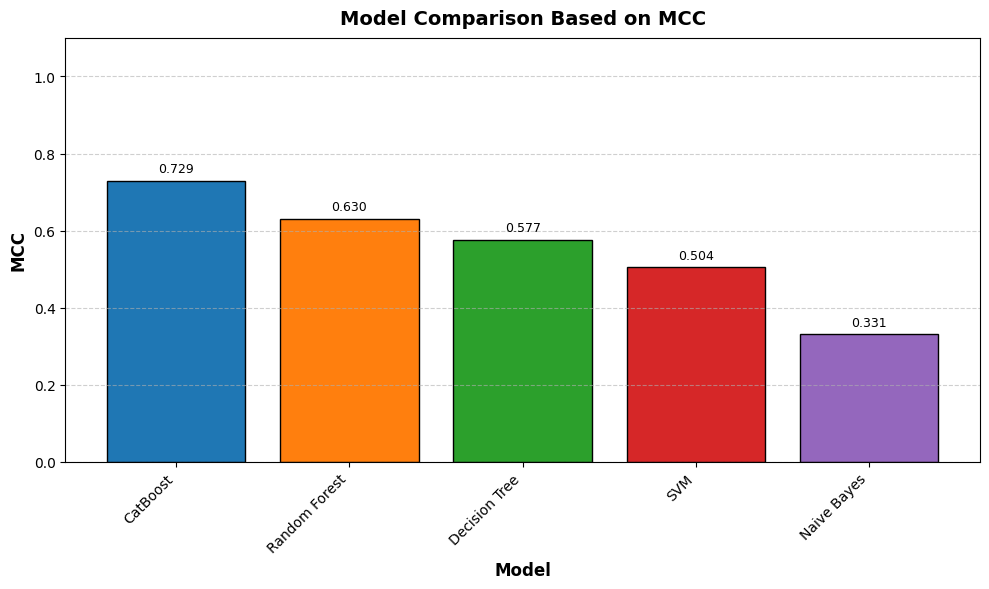

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# فرض: df_metrics شامل مقادیر مدل‌ها و معیارهای ارزیابی است
for item in df_metrics.columns:
    plt.figure(figsize=(10, 6), facecolor="white")
    
    # مرتب‌سازی بر اساس مقدار
    data_sorted = df_metrics[item].sort_values(ascending=False)
    bars = plt.bar(data_sorted.index, data_sorted.values, 
                   color=plt.get_cmap("tab10").colors, edgecolor='black')
    
    # نمایش مقدار بالای هر ستون
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.015, 
                 f"{height:.3f}", ha='center', va='bottom', fontsize=9)
    
    # عنوان و لیبل‌ها
    plt.title(f"Model Comparison Based on {item}", fontsize=14, fontweight='bold', pad=10)
    plt.ylabel(item, fontsize=12, fontweight='bold')
    plt.xlabel("Model", fontsize=12, fontweight='bold')
    
    # محدودیت محور y
    plt.ylim(0, 1.1)
    
    # گرید ملایم
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # چرخش برچسب‌ها
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plt.tight_layout()
    plt.show()


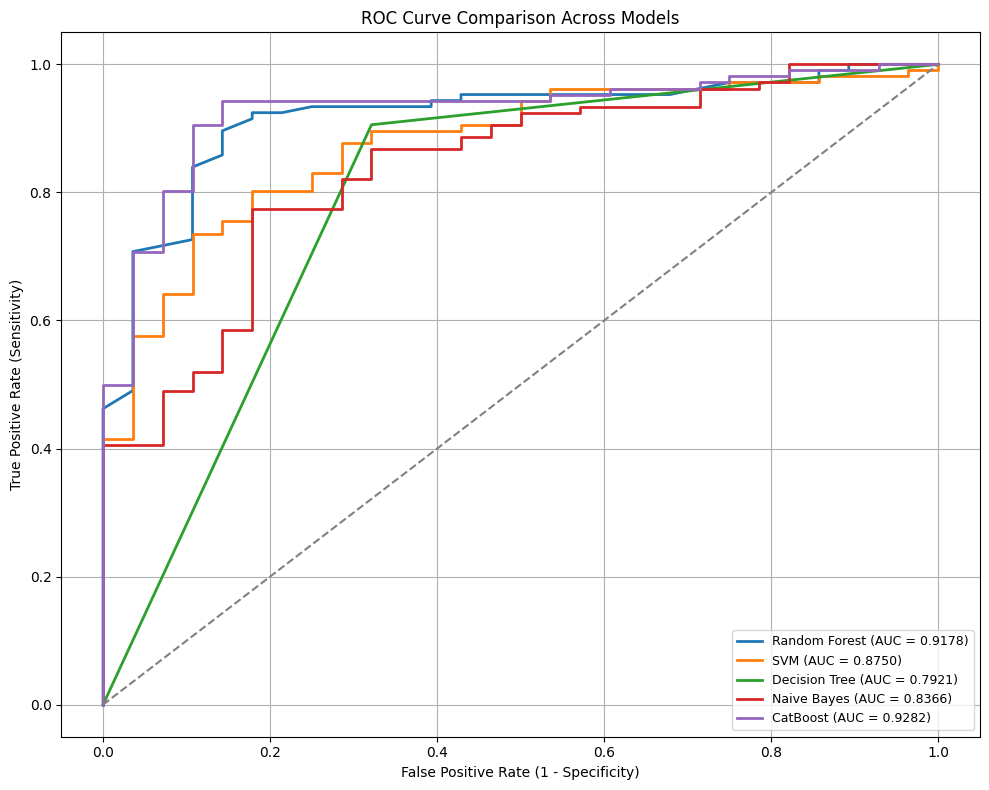

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# لیست مدل‌ها و پیش‌بینی‌های احتمالی
models_probas = {
    "Random Forest": y_proba,
    "SVM": y_proba_svm,
    "Decision Tree": y_proba_dt,
    "Naive Bayes": y_proba_nb,
    "CatBoost": y_proba_cat
}

# رسم ROC برای هر مدل
plt.figure(figsize=(10, 8))
for model_name, y_proba_model in models_probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba_model)
    auc_score = roc_auc_score(y_test, y_proba_model)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})", linewidth=2)

# خط مرجع
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# تنظیمات نمودار
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- فقط مدل‌های موجود در models_probas را نگه داریم و به همان ترتیب نمایش دهیم ---
wanted_models = list(models_probas.keys())  # ["Random Forest","SVM","Decision Tree","Naive Bayes","CatBoost"]

# اگر بعضی از این مدل‌ها در cv_df نبودند، آن‌ها را حذف می‌کنیم تا ارور ندهد
available_models = [m for m in wanted_models if m in cv_df.index]

# متریک‌هایی که می‌خواهیم رسم کنیم
metrics = ["Accuracy", "Sensitivity", "Specificity", "AUC-ROC"]

# فیلتر و بازچینی cv_df
cv_df_sub = cv_df.loc[available_models, metrics].copy()

# --- رسم نمودار (مرتب و خوانا) ---
plt.figure(figsize=(12, 6), facecolor="white")

ax = cv_df_sub.plot(
    kind="bar",
    figsize=(12, 6),
    edgecolor="black",
)

plt.title("Mean Cross-Validation Metrics (Selected Models)", fontsize=14, fontweight="bold", pad=10)
plt.ylabel("Score", fontsize=12, fontweight="bold")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)  # نام مدل‌ها افقی و خوانا
plt.grid(axis="y", linestyle="--", alpha=0.5)

# جابجایی legend به خارج از شکل
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=len(metrics), frameon=False)

plt.tight_layout()
plt.show()


In [89]:
import pandas as pd

# ساخت جدول نتایج Cross-Validation
cv_metrics_table = {
    "Random Forest": [
        cv_results['test_accuracy'].mean(),
        cv_results['test_sensitivity'].mean(),
        cv_results['test_specificity'].mean(),
        cv_results['test_precision'].mean() if 'test_precision' in cv_results else None,
        cv_results['test_f1'].mean() if 'test_f1' in cv_results else None,
        cv_results['test_roc_auc'].mean(),
        None  # MCC در cross_validate به طور پیش‌فرض محاسبه نمی‌شود مگر اینکه تعریفش کنیم
    ],
    "SVM": [
        svm_cv_results['test_accuracy'].mean(),
        svm_cv_results['test_sensitivity'].mean(),
        svm_cv_results['test_specificity'].mean(),
        svm_cv_results['test_precision'].mean() if 'test_precision' in svm_cv_results else None,
        svm_cv_results['test_f1'].mean() if 'test_f1' in svm_cv_results else None,
        svm_cv_results['test_roc_auc'].mean(),
        None
    ],
    "Decision Tree": [
        dt_cv_results['test_accuracy'].mean(),
        dt_cv_results['test_sensitivity'].mean(),
        dt_cv_results['test_specificity'].mean(),
        dt_cv_results['test_precision'].mean() if 'test_precision' in dt_cv_results else None,
        dt_cv_results['test_f1'].mean() if 'test_f1' in dt_cv_results else None,
        dt_cv_results['test_roc_auc'].mean(),
        None
    ],
    "Naive Bayes": [
        nb_cv_results['test_accuracy'].mean(),
        nb_cv_results['test_sensitivity'].mean(),
        nb_cv_results['test_specificity'].mean(),
        nb_cv_results['test_precision'].mean() if 'test_precision' in nb_cv_results else None,
        nb_cv_results['test_f1'].mean() if 'test_f1' in nb_cv_results else None,
        nb_cv_results['test_roc_auc'].mean(),
        None
    ],
 
    "CatBoost": [
        cat_cv_results['test_accuracy'].mean(),
        cat_cv_results['test_sensitivity'].mean(),
        cat_cv_results['test_specificity'].mean(),
        cat_cv_results['test_precision'].mean() if 'test_precision' in cat_cv_results else None,
        cat_cv_results['test_f1'].mean() if 'test_f1' in cat_cv_results else None,
        cat_cv_results['test_roc_auc'].mean(),
        None
    ],
}

# تبدیل به DataFrame
cv_df_metrics = pd.DataFrame(cv_metrics_table, index=metrics_names).T.round(4)

# نمایش جدول نهایی
print("📊 جدول میانگین Cross-Validation مدل‌ها:")
display(cv_df_metrics)  # در Jupyter


📊 جدول میانگین Cross-Validation مدل‌ها:


,Accuracy,Sensitivity,Specificity,Precision,F1-Score,AUC-ROC,MCC
Random Forest,0.9221,0.9057,0.9390,NaN,NaN,0.9792,NaN
SVM,0.8420,0.7655,0.9185,NaN,NaN,0.9015,NaN
Decision Tree,0.8769,0.8645,0.8897,NaN,NaN,0.8771,NaN
Naive Bayes,0.7210,0.4745,0.9672,NaN,NaN,0.9091,NaN
CatBoost,0.9241,0.8852,0.9633,NaN,NaN,0.9783,NaN


In [90]:
cv_df_metrics.to_csv("cross_validation_model_comparison.csv")
print("✅ جدول ذخیره شد: cross_validation_model_comparison.csv")

✅ جدول ذخیره شد: cross_validation_model_comparison.csv


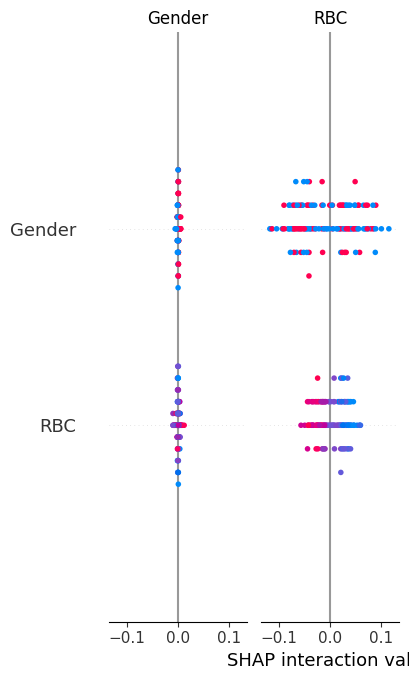

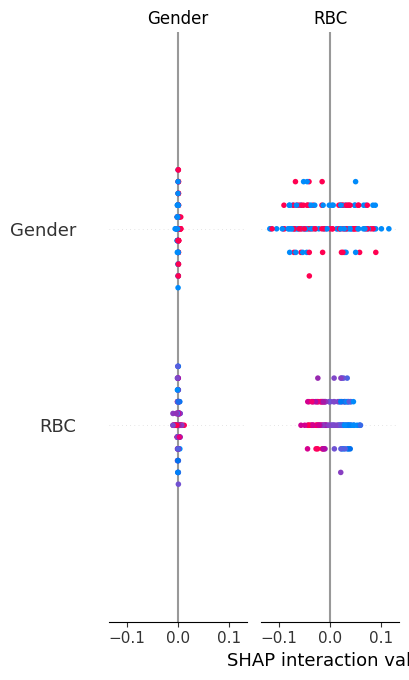

In [96]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# فرض: df دیتافریم نهایی شماست که ستون 'IDA_Label' دارد
X = df.drop(columns=["IDA_Label"])
y = df["IDA_Label"]

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# آموزش مدل Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ساخت explainer مخصوص مدل‌های درختی
explainer = shap.TreeExplainer(model)

# محاسبه SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# اگر خروجی لیست بود، از کلاس 1 استفاده کن
if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # برای کلاس 1 (IDA_Label = 1)
else:
    shap_vals = shap_values     # برای binary mode که مستقیم برمی‌گردونه

# 📊 خلاصه barplot
shap.summary_plot(shap_vals, X_test, plot_type="bar", show=True)

# 🐝 beeswarm
shap.summary_plot(shap_vals, X_test, plot_type="dot", show=True)



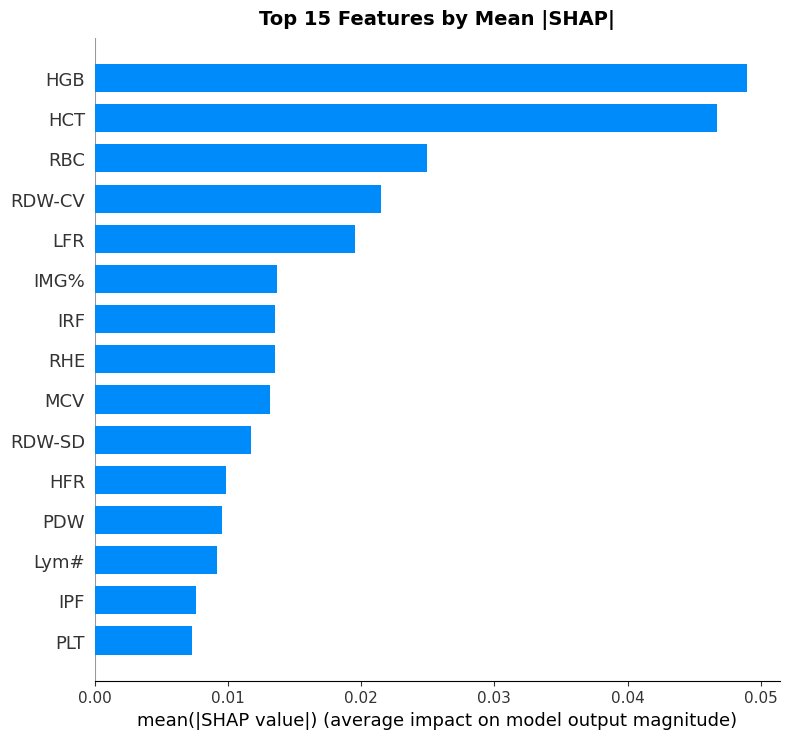

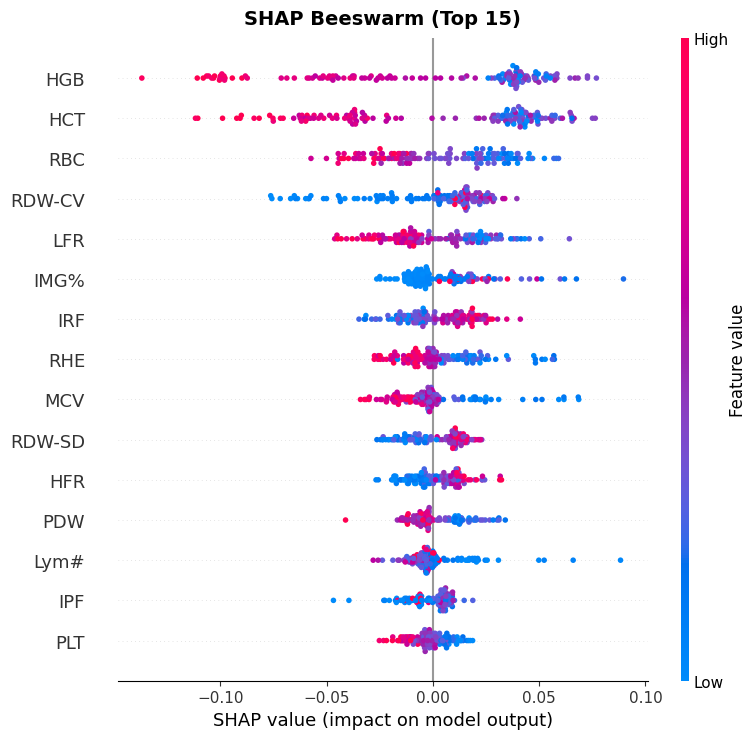

<Figure size 700x500 with 0 Axes>

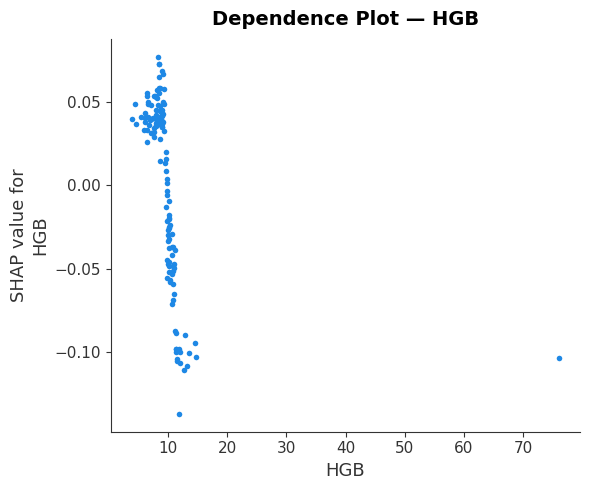

In [101]:
import shap
import matplotlib.pyplot as plt

# مرحله 1: ساخت explainer
explainer = shap.TreeExplainer(model)

# مرحله 2: محاسبه shap_values
shap_vals_all = explainer.shap_values(X_test)

# چون شکل خروجی (samples, features, classes) است، کلاس 1 رو می‌گیریم
shap_vals = shap_vals_all[:, :, 1]

import numpy as np
import matplotlib.pyplot as plt

# --- انتخاب کلاس مثبت در صورت سه‌بعدی بودن خروجی ---
if isinstance(shap_vals_all, list):
    shap_vals = shap_vals_all[1]            # برای مدل‌های دودویی (کلاس 1)
else:
    shap_vals = shap_vals_all               # ممکنه (n, f) یا (n, f, c) باشه
    if shap_vals.ndim == 3 and shap_vals.shape[-1] >= 2:
        shap_vals = shap_vals[:, :, 1]      # کلاس 1

# تنظیمات عمومی
TOP_N = 15
save_dir = "outputs/shap_plots"
import os; os.makedirs(save_dir, exist_ok=True)

# --- 1) Summary bar (Top-N) ---
plt.figure(figsize=(8, 6), facecolor="white")
shap.summary_plot(
    shap_vals, X_test, plot_type="bar",
    max_display=TOP_N, show=False
)
plt.title(f"Top {TOP_N} Features by Mean |SHAP|", fontsize=14, fontweight="bold", pad=10)
plt.tight_layout()
plt.savefig(f"{save_dir}/summary_bar_top{TOP_N}.png", dpi=300, bbox_inches="tight")
plt.show()

# --- 2) Beeswarm (Top-N) ---
plt.figure(figsize=(9, 7), facecolor="white")
shap.summary_plot(
    shap_vals, X_test, plot_type="dot",
    max_display=TOP_N, color_bar=True, show=False
)
plt.title(f"SHAP Beeswarm (Top {TOP_N})", fontsize=14, fontweight="bold", pad=10)
plt.tight_layout()
plt.savefig(f"{save_dir}/beeswarm_top{TOP_N}.png", dpi=300, bbox_inches="tight")
plt.show()

# --- 3) Dependence plot برای مهم‌ترین فیچر ---
top_idx = np.abs(shap_vals).mean(0).argmax()
top_feature = X_test.columns[top_idx]

plt.figure(figsize=(7, 5), facecolor="white")
# interaction_index=None یعنی فقط خود فیچر؛ تمیزتر و بدون خطای ابعادی
shap.dependence_plot(
    top_feature, shap_vals, X_test,
    interaction_index=None, show=False
)
plt.title(f"Dependence Plot — {top_feature}", fontsize=14, fontweight="bold", pad=10)
plt.tight_layout()
plt.savefig(f"{save_dir}/dependence_{top_feature}.png", dpi=300, bbox_inches="tight")
plt.show()

